In [3]:
# !pip install keras==2.2.0

  Using cached Keras-2.2.0-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached Keras-2.2.0-py2.py3-none-any.whl (300 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.2.0 requires keras-preprocessing>=1.1.0, but you have keras-preprocessing 1.0.1 which is incompatible.
tensorflow 2.2.0 requires scipy==1.4.1; python_version >= "3", but you have scipy 1.10.1 which is incompatible.


In [38]:
# !pip install tensorflow==2.15.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [2]:
import keras
print(keras.__version__)

2.2.0


Using TensorFlow backend.


In [ ]:
# !pip uninstall scikeras

In [7]:
# from keras.models import Sequential,Model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,FunctionTransformer,Normalizer
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam
from tensorflow.keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
from scipy import stats
from scipy.stats import boxcox

import warnings
from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
tf.compat.v1.disable_eager_execution()
print(tf.compat.v1.get_default_graph())

In [9]:
df=pd.read_csv("Datasets/UNSW_NB15_training-set.csv")
df2=pd.read_csv("Datasets/UNSW_NB15_testing-set.csv")

In [10]:
df

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
0       90909.090200  ...                 1               2             0   
1      125000.000300  ...                 1               2             0   
2      200000.005100  ...                 1               3             0   
3      166666.660800  ...                 1               3             0   
4      100000.002500  ...                 1               3             0   
...              ...  ...               ...             ...           ...   
82327  200000.005100  ...                 1               2             0   
82328      24.410067  ...                 1               1             0   
82329       0.000000  ...                 1               1             0   
82330       0.000000  ...                 1               1             0   
82331  111111.107200  ...                 1               1             0   

       ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
0               0                 0           1           2                0   
1               0                 0           1           2                0   
2               0                 0           1           3                0   
3               0                 0           2           3                0   
4               0                 0           2           3                0   
...           ...               ...         ...         ...              ...   
82327           0                 0           2           1                0   
82328           0                 0           3           2                0   
82329           0                 0           1           1                1   
82330           0                 0           1           1                1   
82331           0                 0           1           1                0   

       attack_cat  label  
0          Normal      0  
1          Normal      0  
2          Normal      0  
3          Normal      0  
4          Normal      0  
...           ...    ...  
82327      Normal      0  
82328      Normal      0  
82329      Normal      0  
82330      Normal      0  
82331      Normal      0  

[82332 rows x 45 columns]

In [11]:
df_train=df.drop("label",axis=1)
output_col=pd.DataFrame(df['label'])

In [12]:
df_test=df2.drop("label",axis=1)
output_col_test=pd.DataFrame(df2['label'])

In [13]:
output_col

label
0          0
1          0
2          0
3          0
4          0
...      ...
82327      0
82328      0
82329      0
82330      0
82331      0

[82332 rows x 1 columns]

In [14]:
df_train

id       dur proto service state  spkts  dpkts  sbytes  dbytes  \
0          1  0.000011   udp       -   INT      2      0     496       0   
1          2  0.000008   udp       -   INT      2      0    1762       0   
2          3  0.000005   udp       -   INT      2      0    1068       0   
3          4  0.000006   udp       -   INT      2      0     900       0   
4          5  0.000010   udp       -   INT      2      0    2126       0   
...      ...       ...   ...     ...   ...    ...    ...     ...     ...   
82327  82328  0.000005   udp       -   INT      2      0     104       0   
82328  82329  1.106101   tcp       -   FIN     20      8   18062     354   
82329  82330  0.000000   arp       -   INT      1      0      46       0   
82330  82331  0.000000   arp       -   INT      1      0      46       0   
82331  82332  0.000009   udp       -   INT      2      0     104       0   

                rate  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0       90909.090200  ...                 1                 1               2   
1      125000.000300  ...                 1                 1               2   
2      200000.005100  ...                 1                 1               3   
3      166666.660800  ...                 2                 1               3   
4      100000.002500  ...                 2                 1               3   
...              ...  ...               ...               ...             ...   
82327  200000.005100  ...                 1                 1               2   
82328      24.410067  ...                 1                 1               1   
82329       0.000000  ...                 1                 1               1   
82330       0.000000  ...                 1                 1               1   
82331  111111.107200  ...                 1                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0           0                 0           1           2   
1                 0           0                 0           1           2   
2                 0           0                 0           1           3   
3                 0           0                 0           2           3   
4                 0           0                 0           2           3   
...             ...         ...               ...         ...         ...   
82327             0           0                 0           2           1   
82328             0           0                 0           3           2   
82329             0           0                 0           1           1   
82330             0           0                 0           1           1   
82331             0           0                 0           1           1   

       is_sm_ips_ports  attack_cat  
0                    0      Normal  
1                    0      Normal  
2                    0      Normal  
3                    0      Normal  
4                    0      Normal  
...                ...         ...  
82327                0      Normal  
82328                0      Normal  
82329                1      Normal  
82330                1      Normal  
82331                0      Normal  

[82332 rows x 44 columns]

## Preprocessing

In [15]:
df_train.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [16]:
df_train


dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.000011   udp       -   INT      2      0     496       0   
1      0.000008   udp       -   INT      2      0    1762       0   
2      0.000005   udp       -   INT      2      0    1068       0   
3      0.000006   udp       -   INT      2      0     900       0   
4      0.000010   udp       -   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0       90909.090200   254  ...                 1                 1   
1      125000.000300   254  ...                 1                 1   
2      200000.005100   254  ...                 1                 1   
3      166666.660800   254  ...                 2                 1   
4      100000.002500   254  ...                 2                 1   
...              ...   ...  ...               ...               ...   
82327  200000.005100   254  ...                 1                 1   
82328      24.410067   254  ...                 1                 1   
82329       0.000000     0  ...                 1                 1   
82330       0.000000     0  ...                 1                 1   
82331  111111.107200   254  ...                 1                 1   

       ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0                   2             0           0                 0           1   
1                   2             0           0                 0           1   
2                   3             0           0                 0           1   
3                   3             0           0                 0           2   
4                   3             0           0                 0           2   
...               ...           ...         ...               ...         ...   
82327               2             0           0                 0           2   
82328               1             0           0                 0           3   
82329               1             0           0                 0           1   
82330               1             0           0                 0           1   
82331               1             0           0                 0           1   

       ct_srv_dst  is_sm_ips_ports  attack_cat  
0               2                0      Normal  
1               2                0      Normal  
2               3                0      Normal  
3               3                0      Normal  
4               3                0      Normal  
...           ...              ...         ...  
82327           1                0      Normal  
82328           2                0      Normal  
82329           1                1      Normal  
82330           1                1      Normal  
82331           1                0      Normal  

[82332 rows x 43 columns]

In [17]:
df_test

dur proto service state  spkts  dpkts  sbytes  dbytes  \
0       0.121478   tcp       -   FIN      6      4     258     172   
1       0.649902   tcp       -   FIN     14     38     734   42014   
2       1.623129   tcp       -   FIN      8     16     364   13186   
3       1.681642   tcp     ftp   FIN     12     12     628     770   
4       0.449454   tcp       -   FIN     10      6     534     268   
...          ...   ...     ...   ...    ...    ...     ...     ...   
175336  0.000009   udp     dns   INT      2      0     114       0   
175337  0.505762   tcp       -   FIN     10      8     620     354   
175338  0.000009   udp     dns   INT      2      0     114       0   
175339  0.000009   udp     dns   INT      2      0     114       0   
175340  0.000009   udp     dns   INT      2      0     114       0   

                 rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0           74.087490   252  ...                 1                 1   
1           78.473372    62  ...                 1                 1   
2           14.170161    62  ...                 1                 1   
3           13.677108    62  ...                 1                 1   
4           33.373826   254  ...                 2                 1   
...               ...   ...  ...               ...               ...   
175336  111111.107200   254  ...                24                13   
175337      33.612649   254  ...                 1                 1   
175338  111111.107200   254  ...                 3                 3   
175339  111111.107200   254  ...                30                14   
175340  111111.107200   254  ...                30                16   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                    1             0           0                 0   
1                    2             0           0                 0   
2                    3             0           0                 0   
3                    3             1           1                 0   
4                   40             0           0                 0   
...                ...           ...         ...               ...   
175336              24             0           0                 0   
175337               2             0           0                 0   
175338              13             0           0                 0   
175339              30             0           0                 0   
175340              30             0           0                 0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
0                1           1                0      Normal  
1                1           6                0      Normal  
2                2           6                0      Normal  
3                2           1                0      Normal  
4                2          39                0      Normal  
...            ...         ...              ...         ...  
175336          24          24                0     Generic  
175337           1           1                0   Shellcode  
175338           3          12                0     Generic  
175339          30          30                0     Generic  
175340          30          30                0     Generic  

[175341 rows x 43 columns]

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [19]:
for col in df_train.columns:
    if df_train[col].dtypes=='object':
        print(df_train[col].value_counts())
        print()

proto
tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: count, Length: 131, dtype: int64

service
-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: count, dtype: int64

state
FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: count, dtype: int64

attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64



## EDA

1. Checking NULL values. If the graph is plane in one color then there is no Null values. If there are NULL values then there will be some lines for that specific column.

<Axes: >

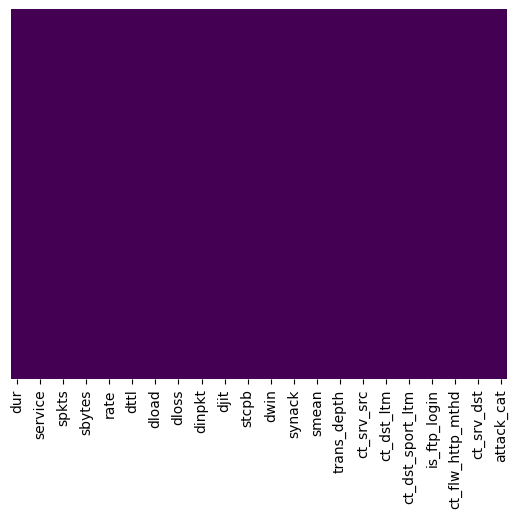

In [20]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

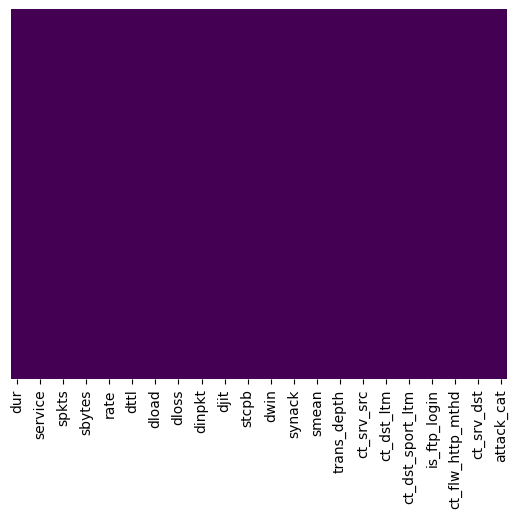

In [21]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

2.Multicollinearity so that columns which have same effect on the label could be easily removed.


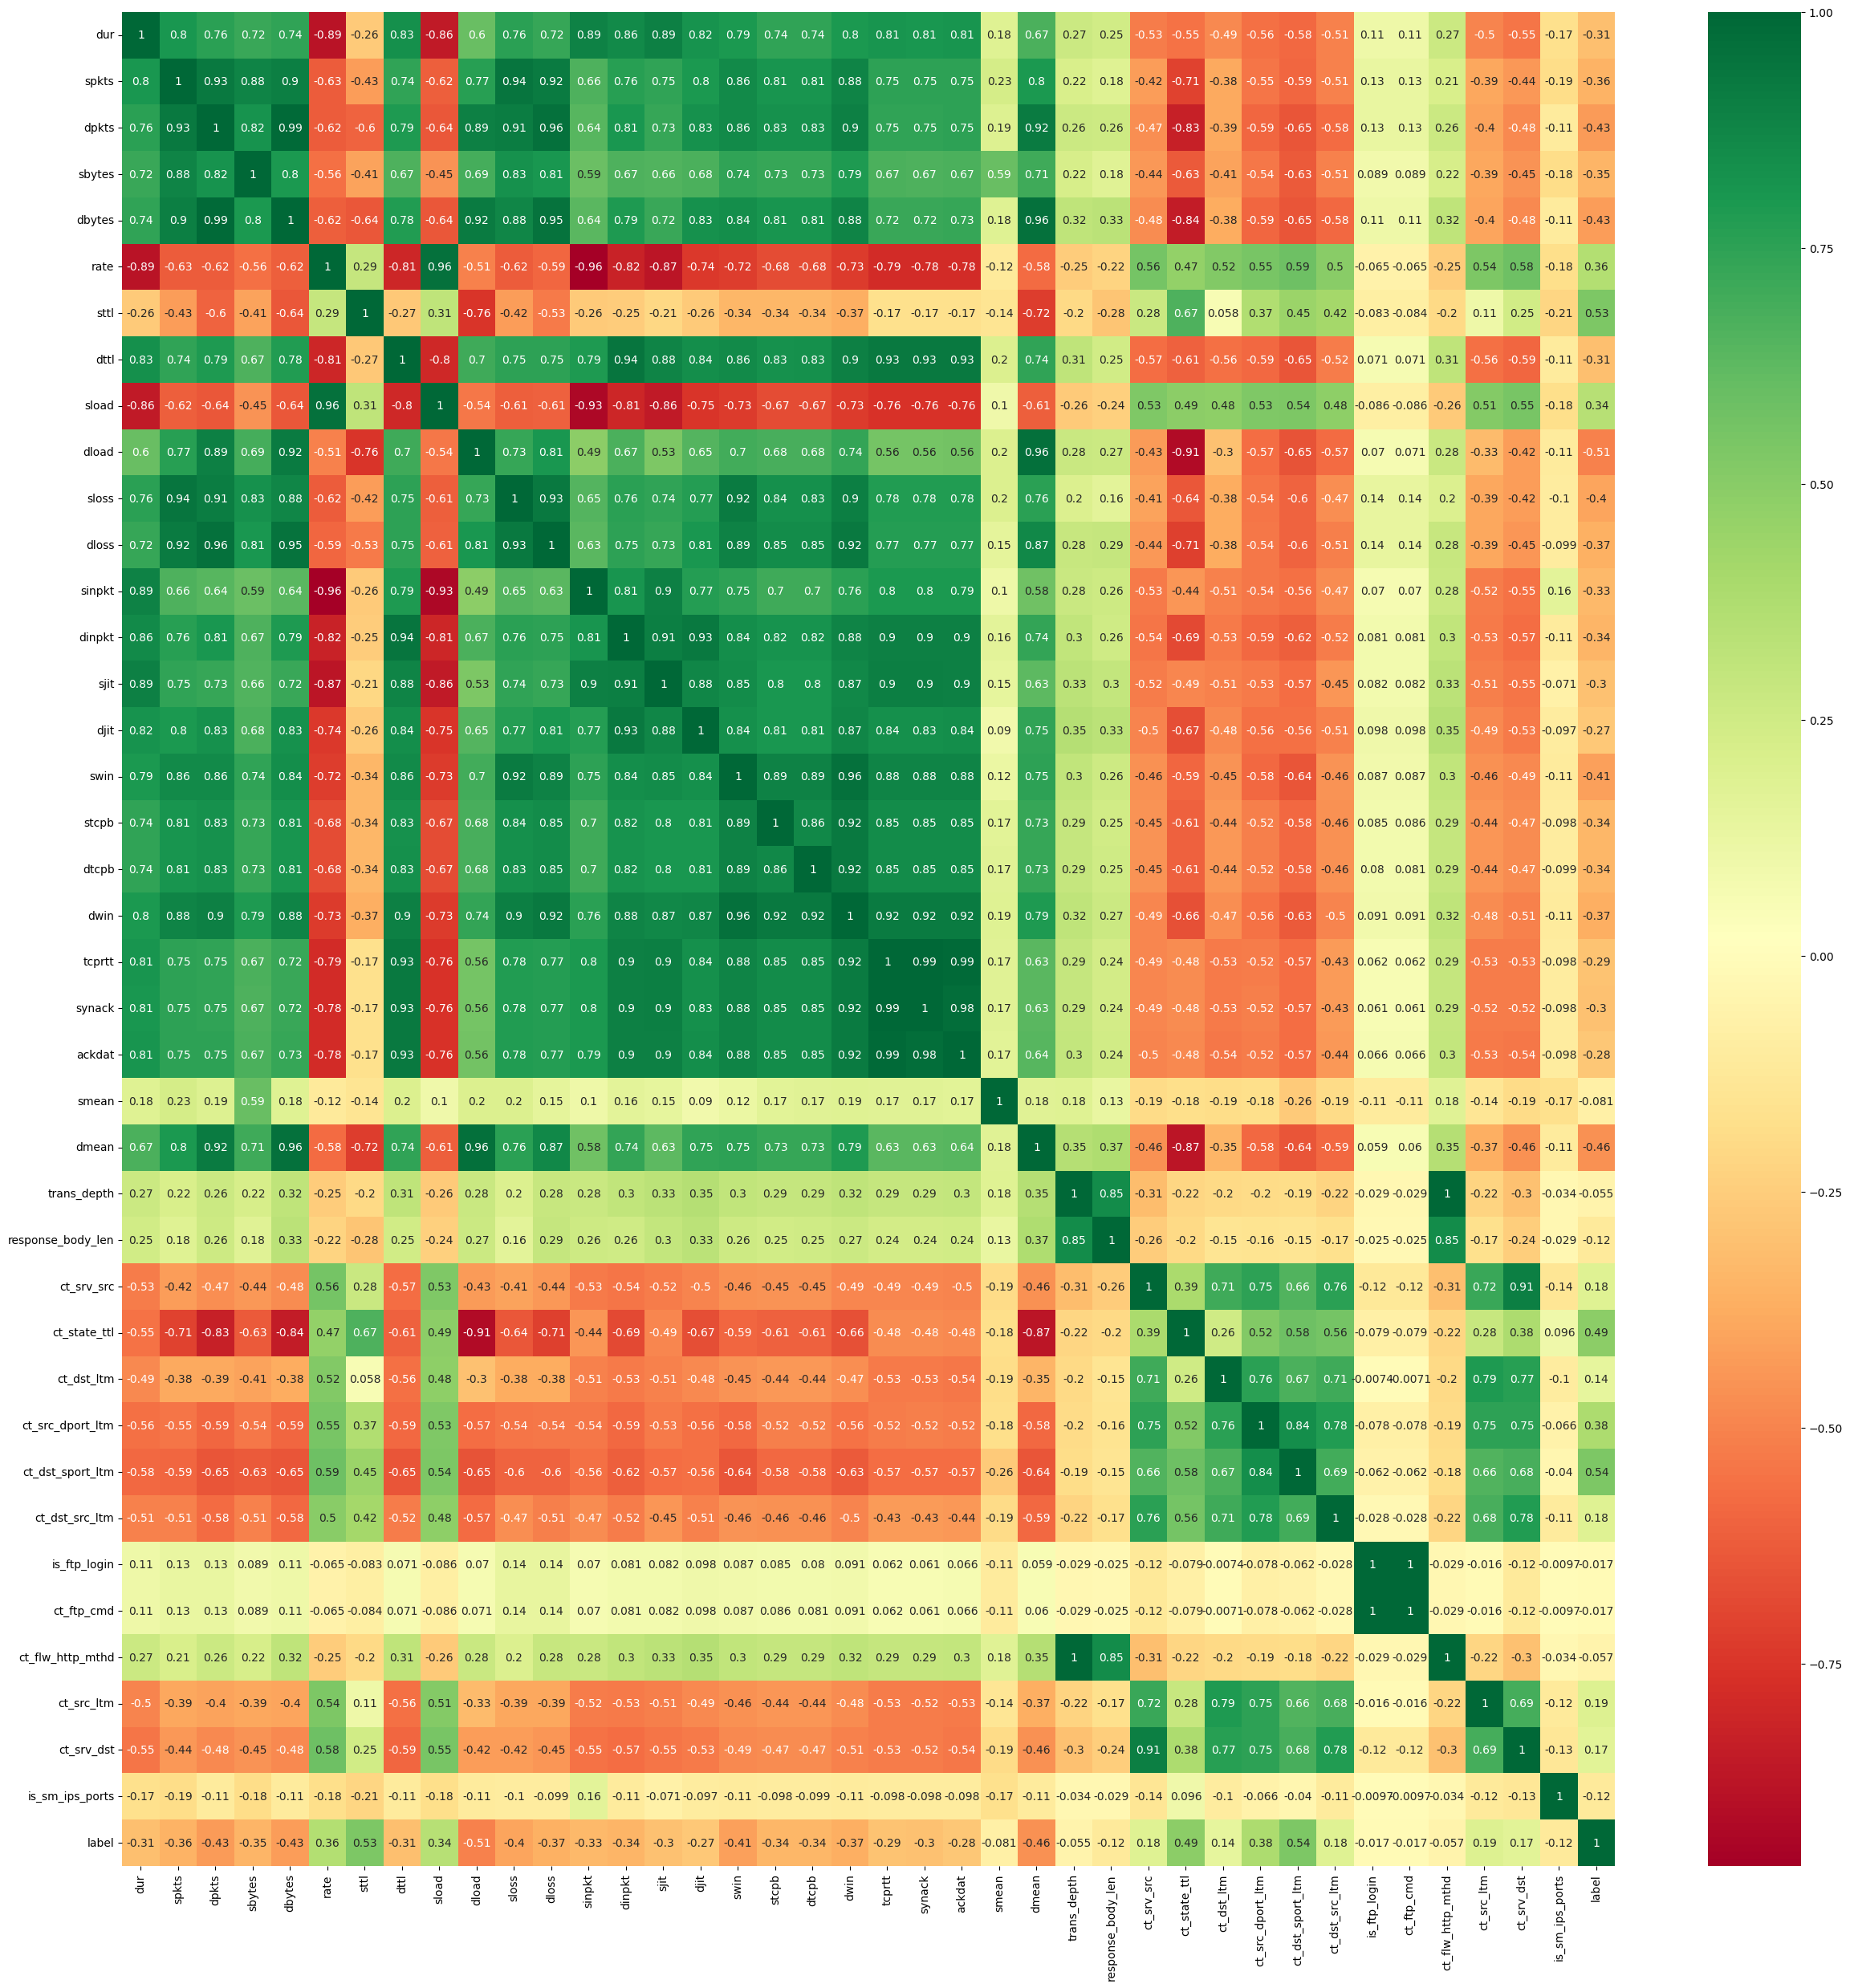

In [22]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([df_train,output_col],axis=1).loc[:,list(pd.concat([df_train,output_col],axis=1).select_dtypes(include= np.number).columns)].corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

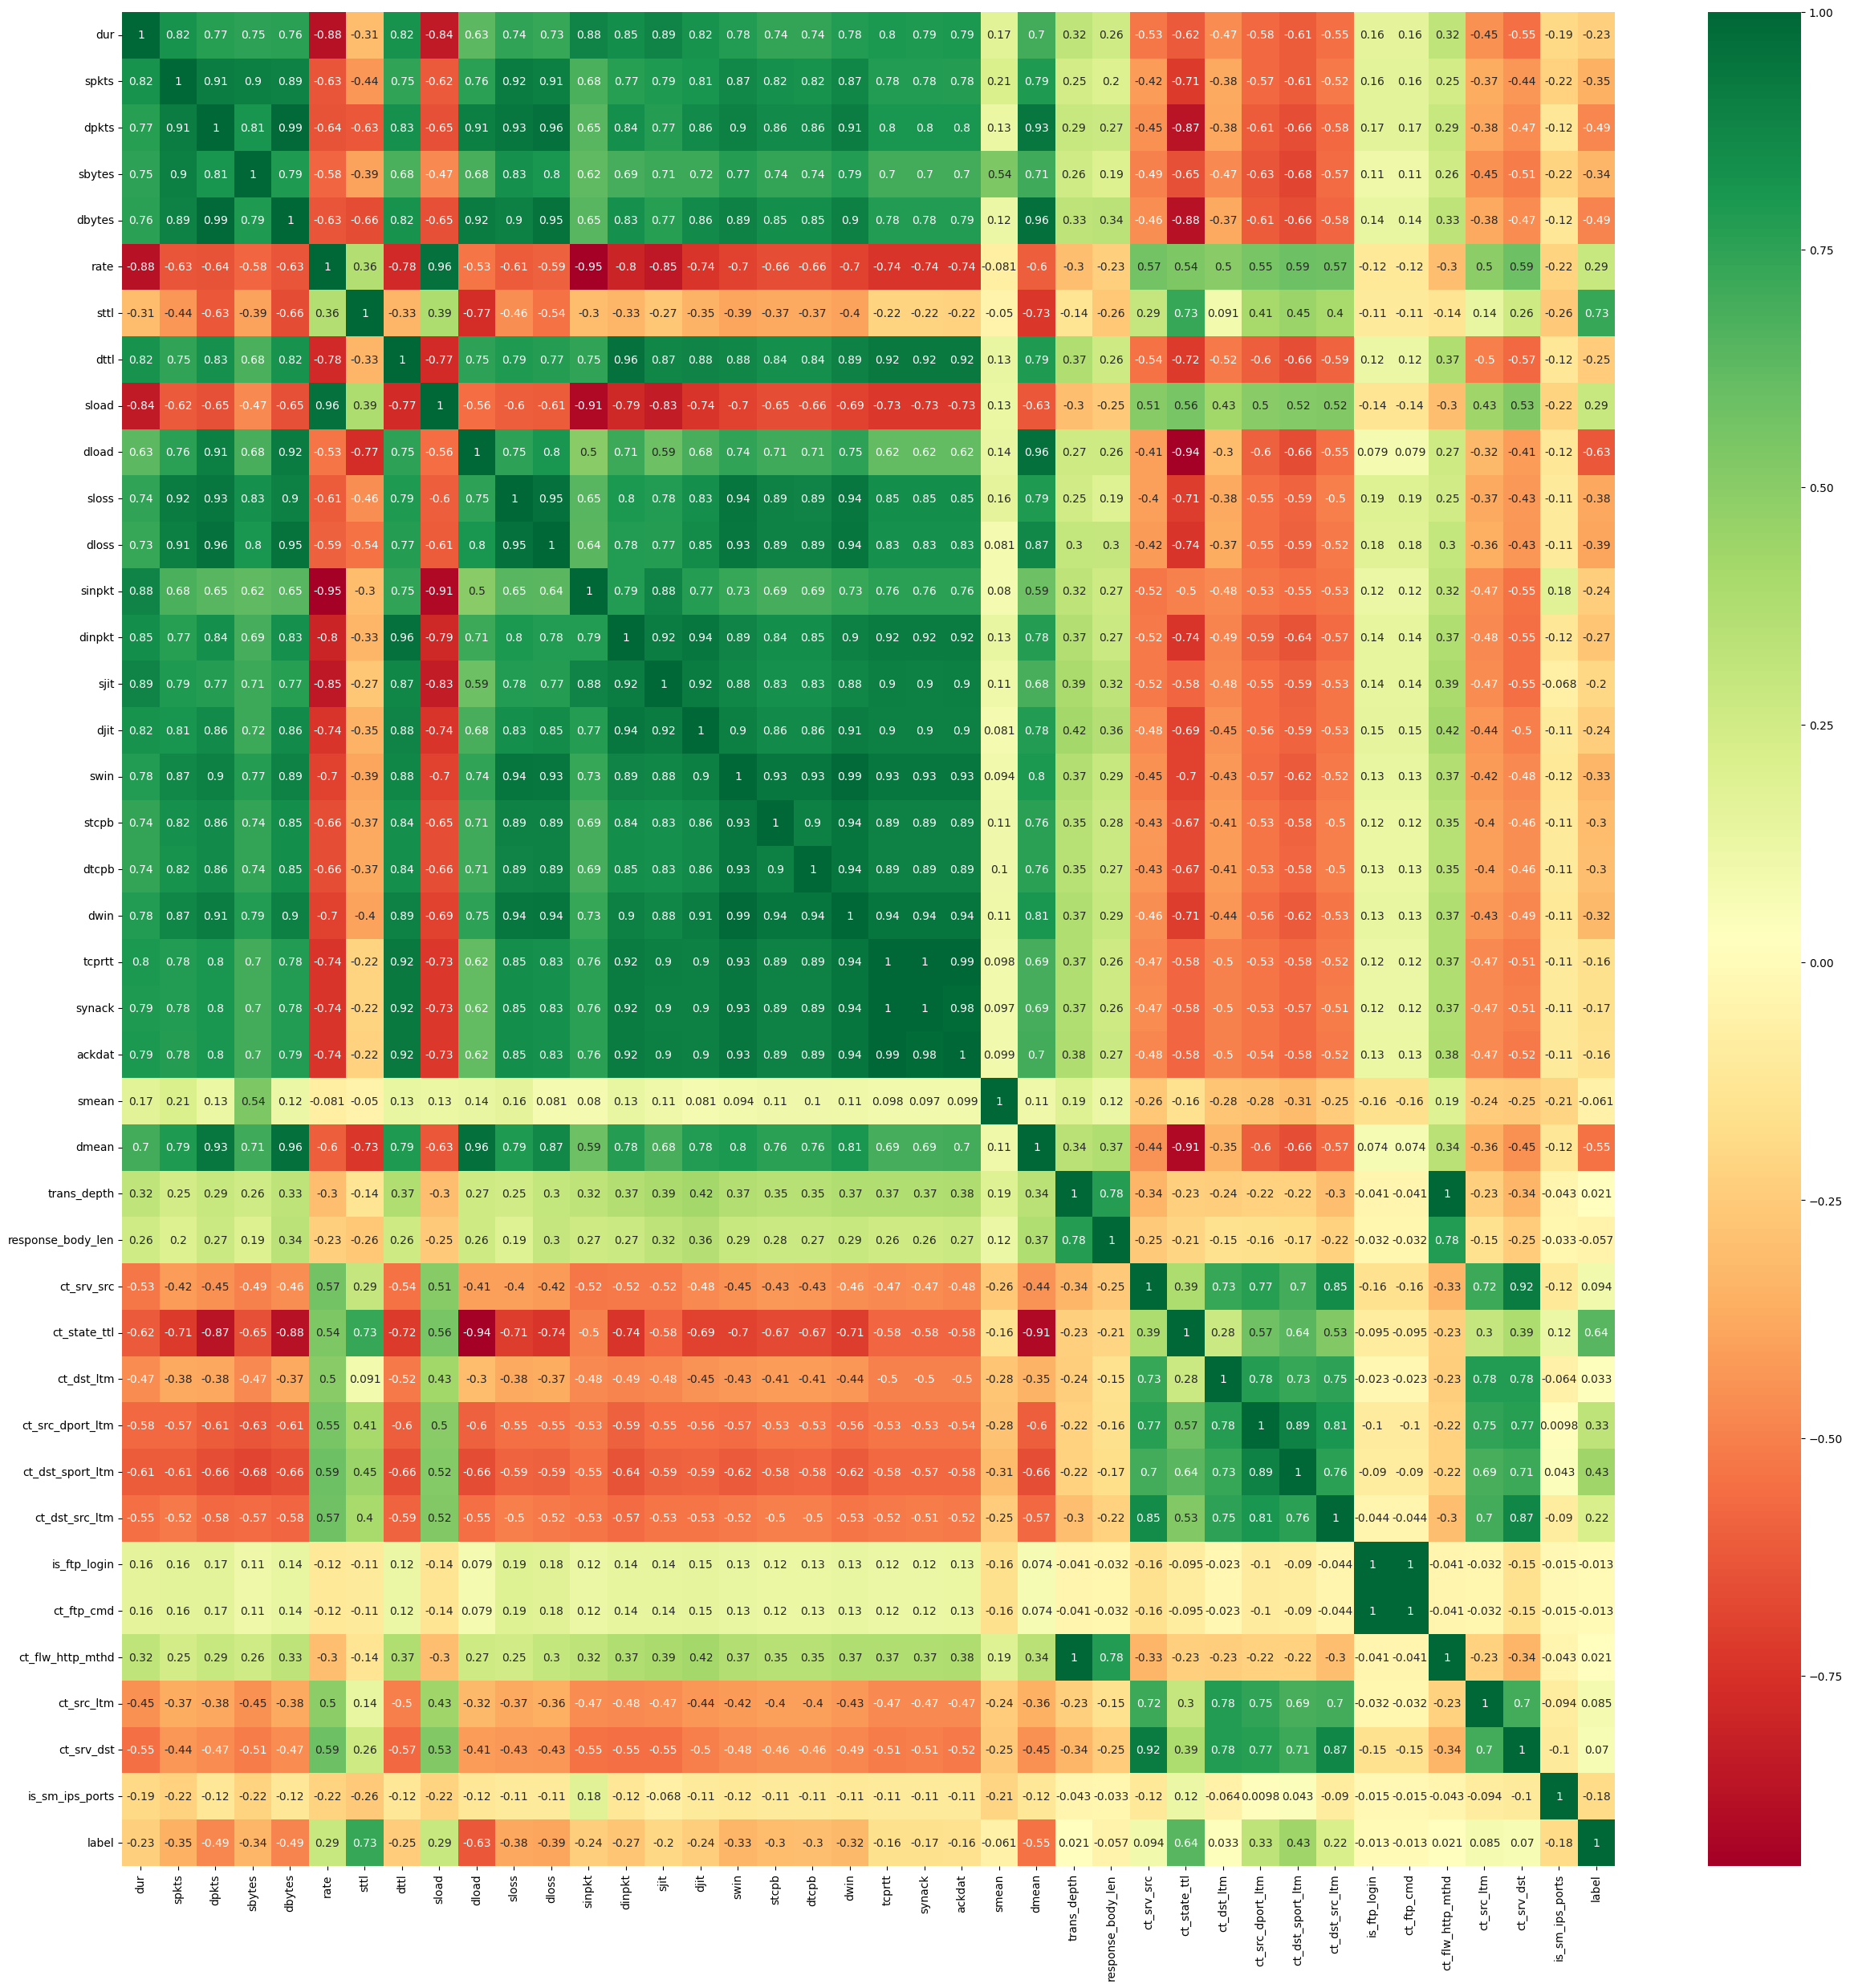

In [23]:
plt.figure(figsize=(30,30))
sns.heatmap(pd.concat([df_test,output_col_test],axis=1).loc[:,list(pd.concat([df_test,output_col_test],axis=1).select_dtypes(include= np.number).columns)].corr(method='spearman'),annot=True,cmap="RdYlGn")
plt.show()

3. Checking outliers 

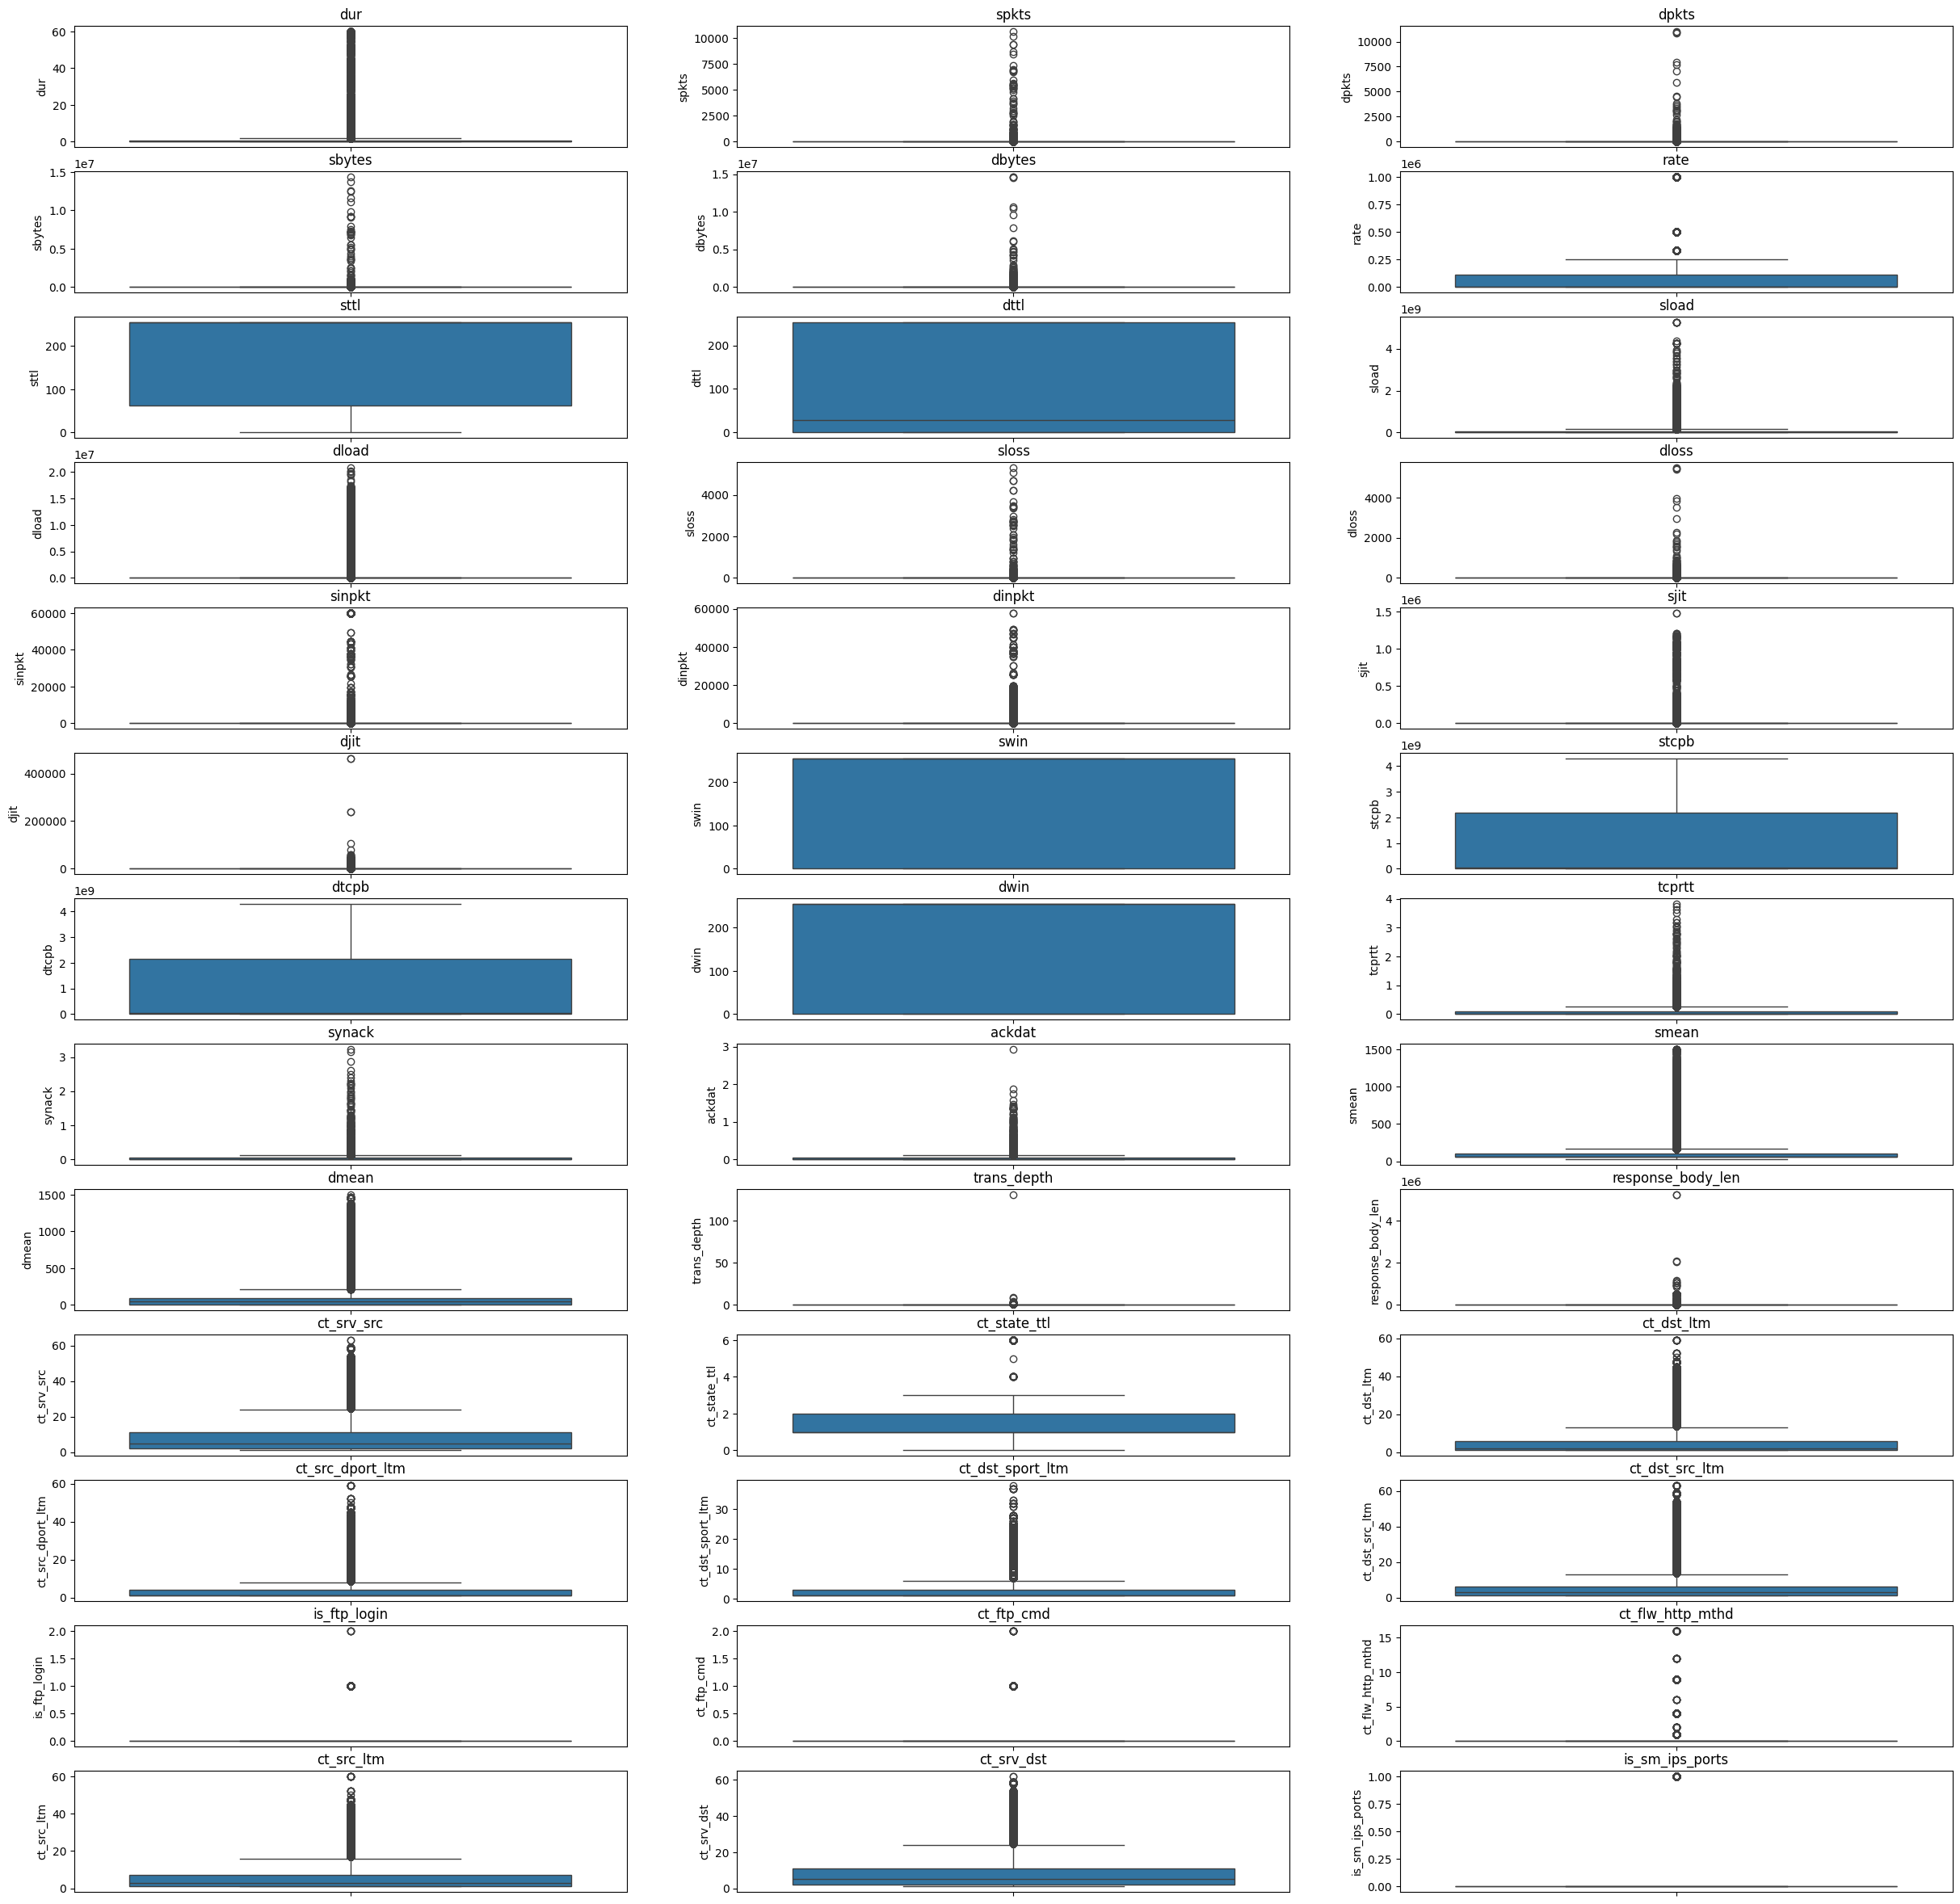

In [24]:
fig, axes = plt.subplots(nrows = 13, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         
fig.set_size_inches(30,30)
cols=list(df_train.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    sns.boxplot(df_train[col], ax = ax)
    ax.set_title(col)

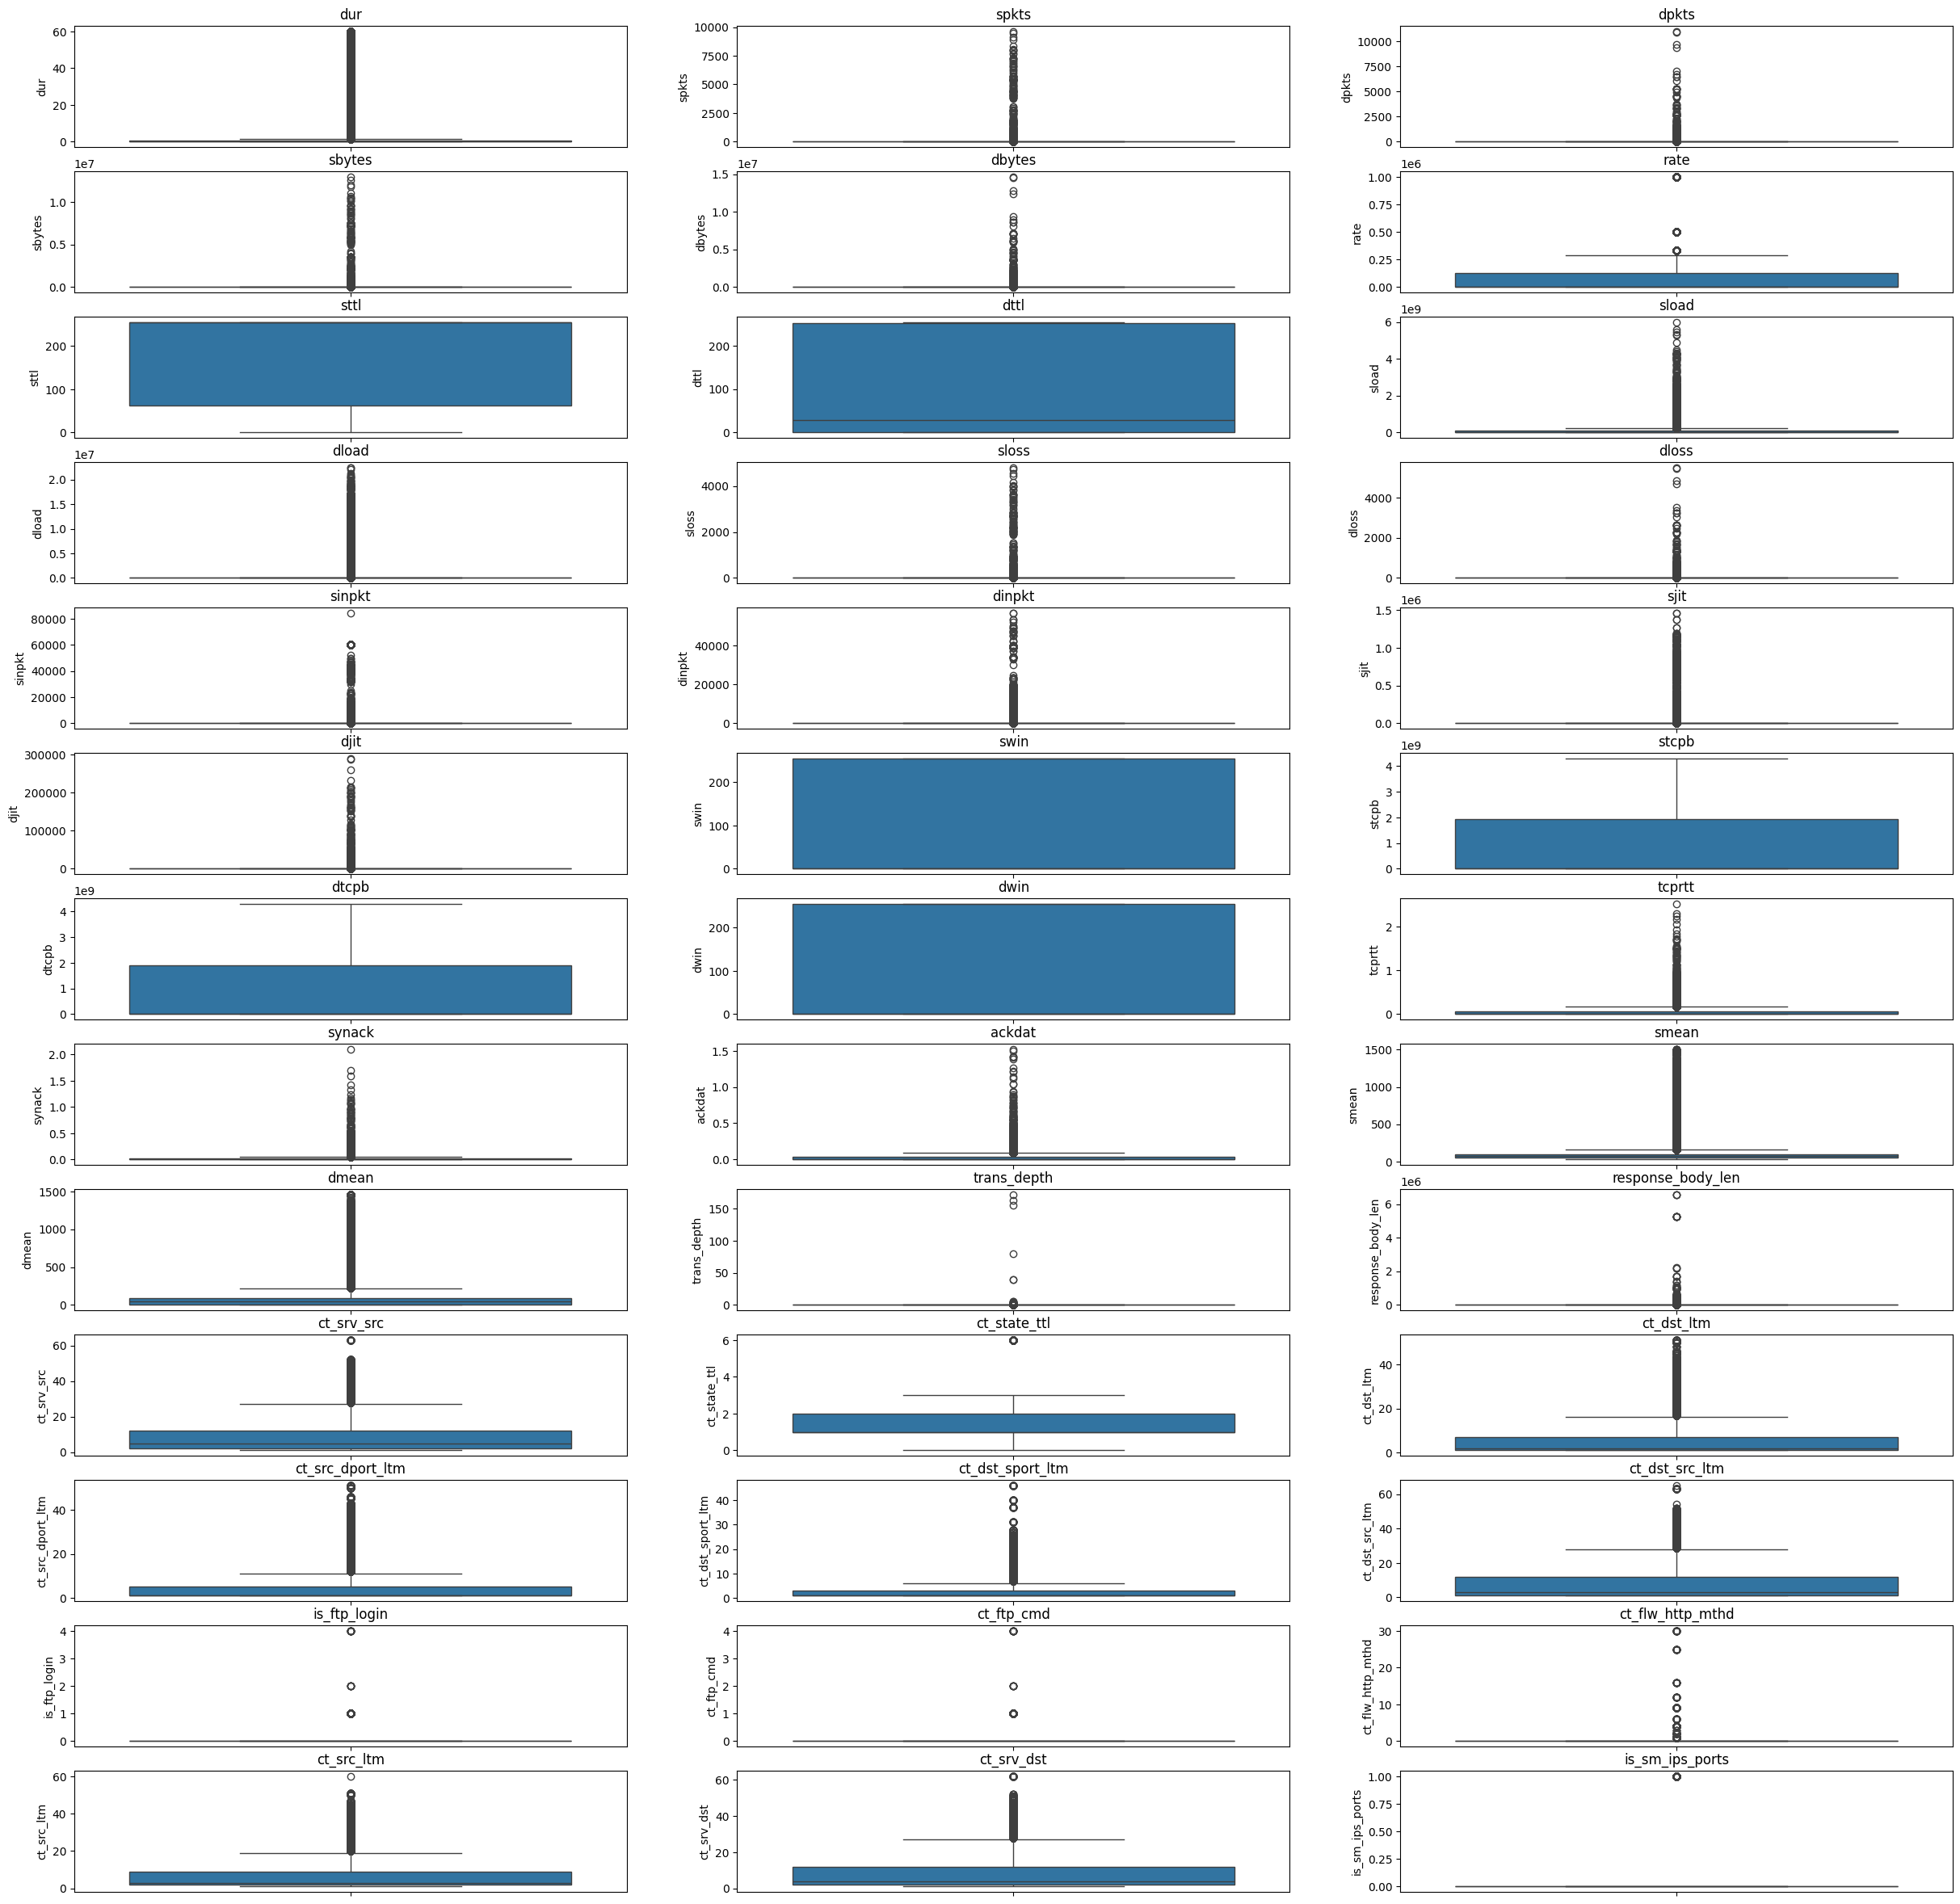

In [25]:
fig, axes = plt.subplots(nrows = 13, ncols = 3)    # axes is 2d array (3x3) since 36 numerical columns
axes = axes.flatten()         
fig.set_size_inches(30,30)
cols=list(df_test.select_dtypes(include= np.number).columns)
for ax, col in zip(axes, cols):
    sns.boxplot(df_test[col], ax = ax)
    ax.set_title(col)

4. Distplot to see spread of data in numerical columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\3031575362.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[col], ax = ax)


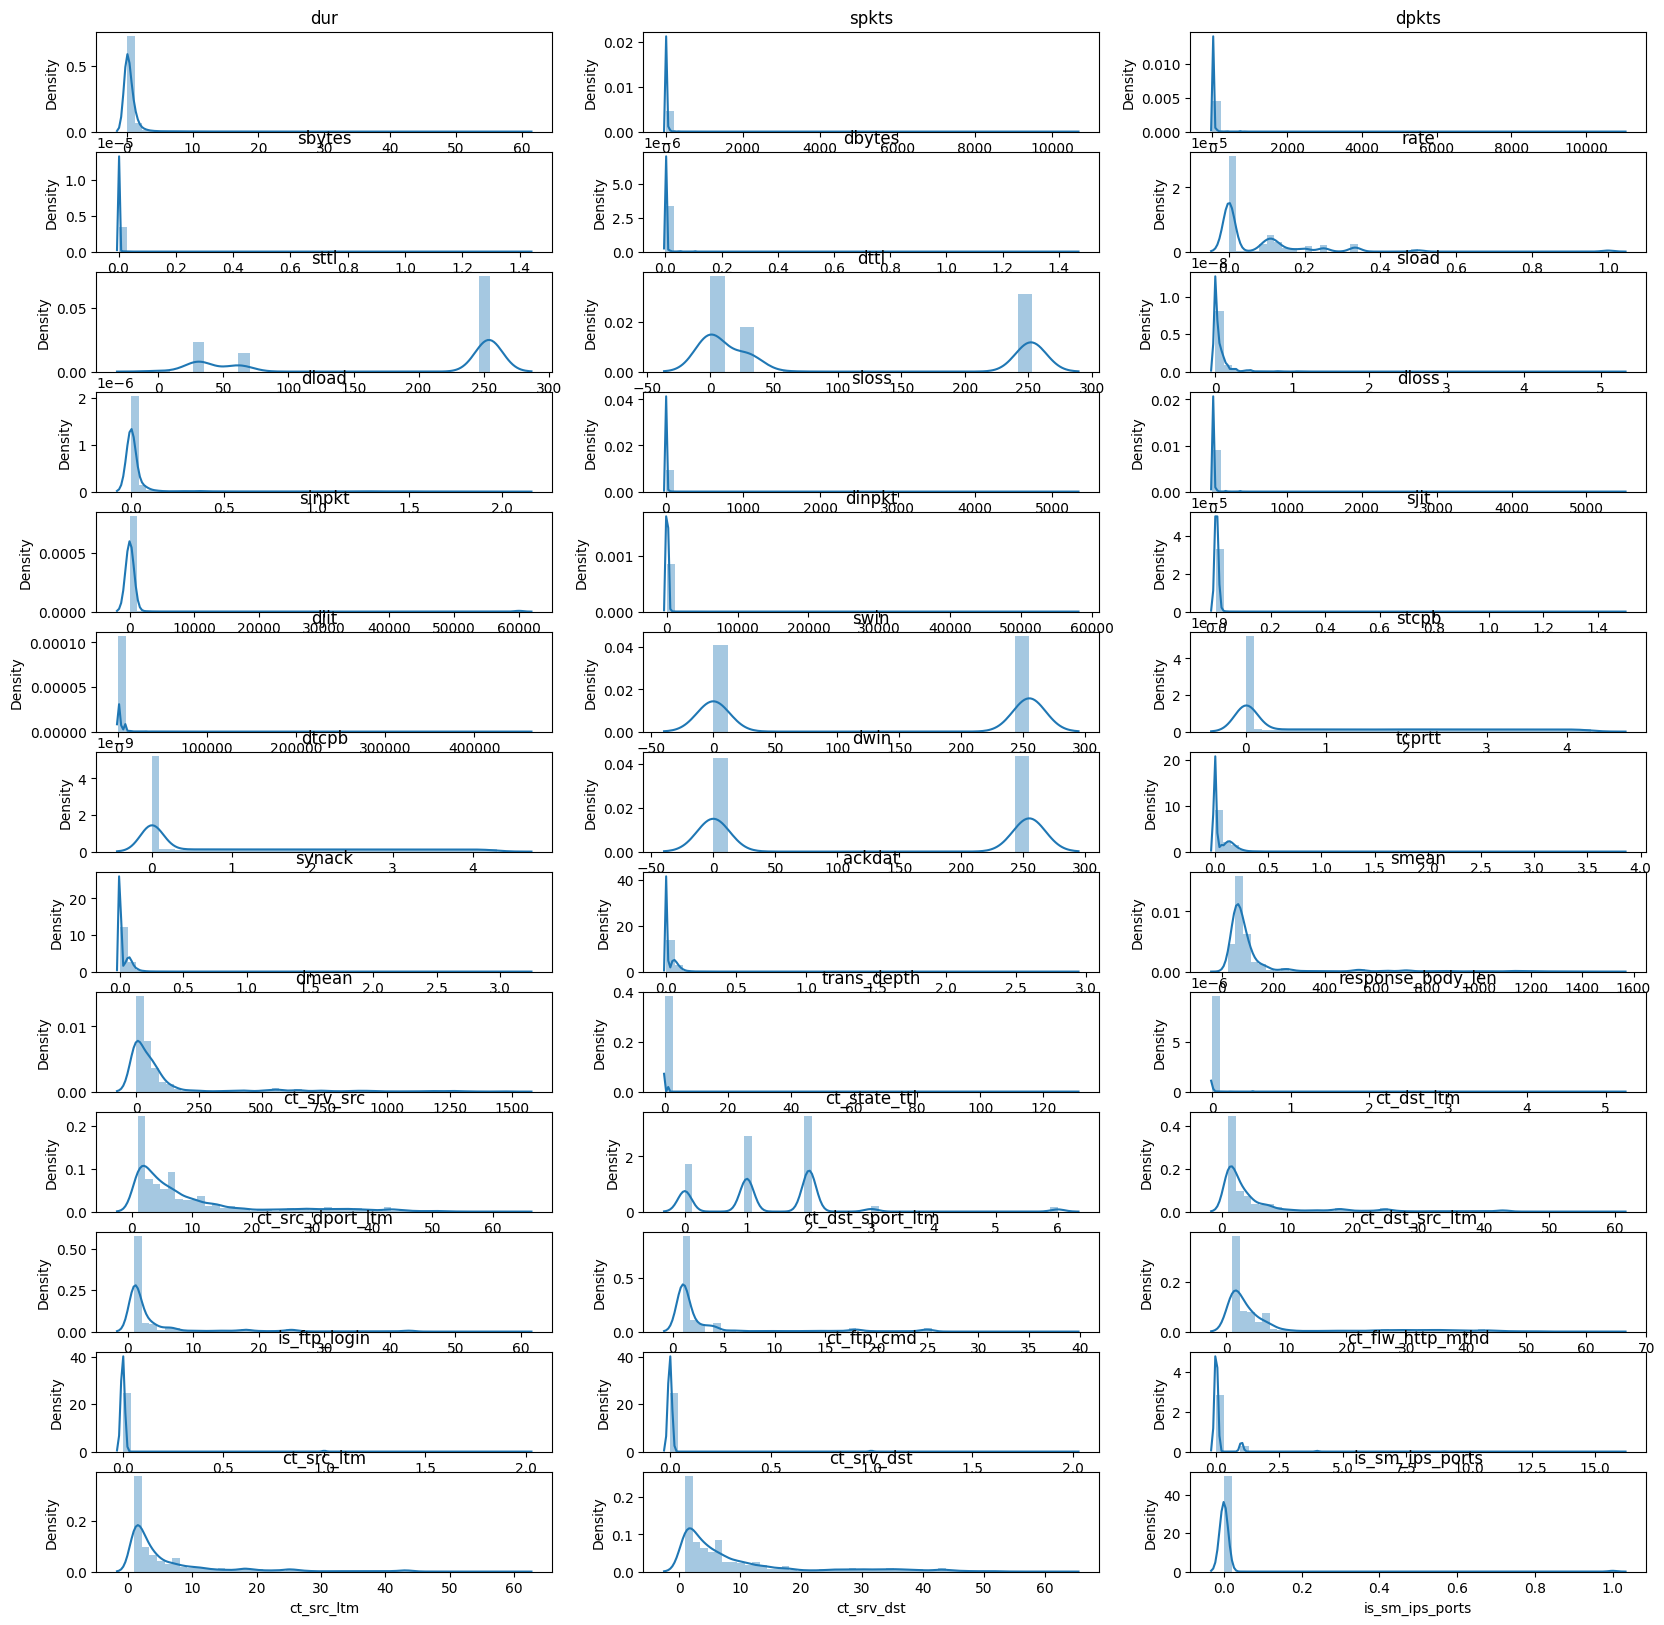

In [26]:
fig, axes = plt.subplots(nrows = 13, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)
cols=list(df_train.select_dtypes(include= np.number).columns)

for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_train[col], ax = ax)
    ax.set_title(col)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


C:\Users\DELL\AppData\Local\Temp\ipykernel_1164\1571960511.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_test[col], ax = ax)


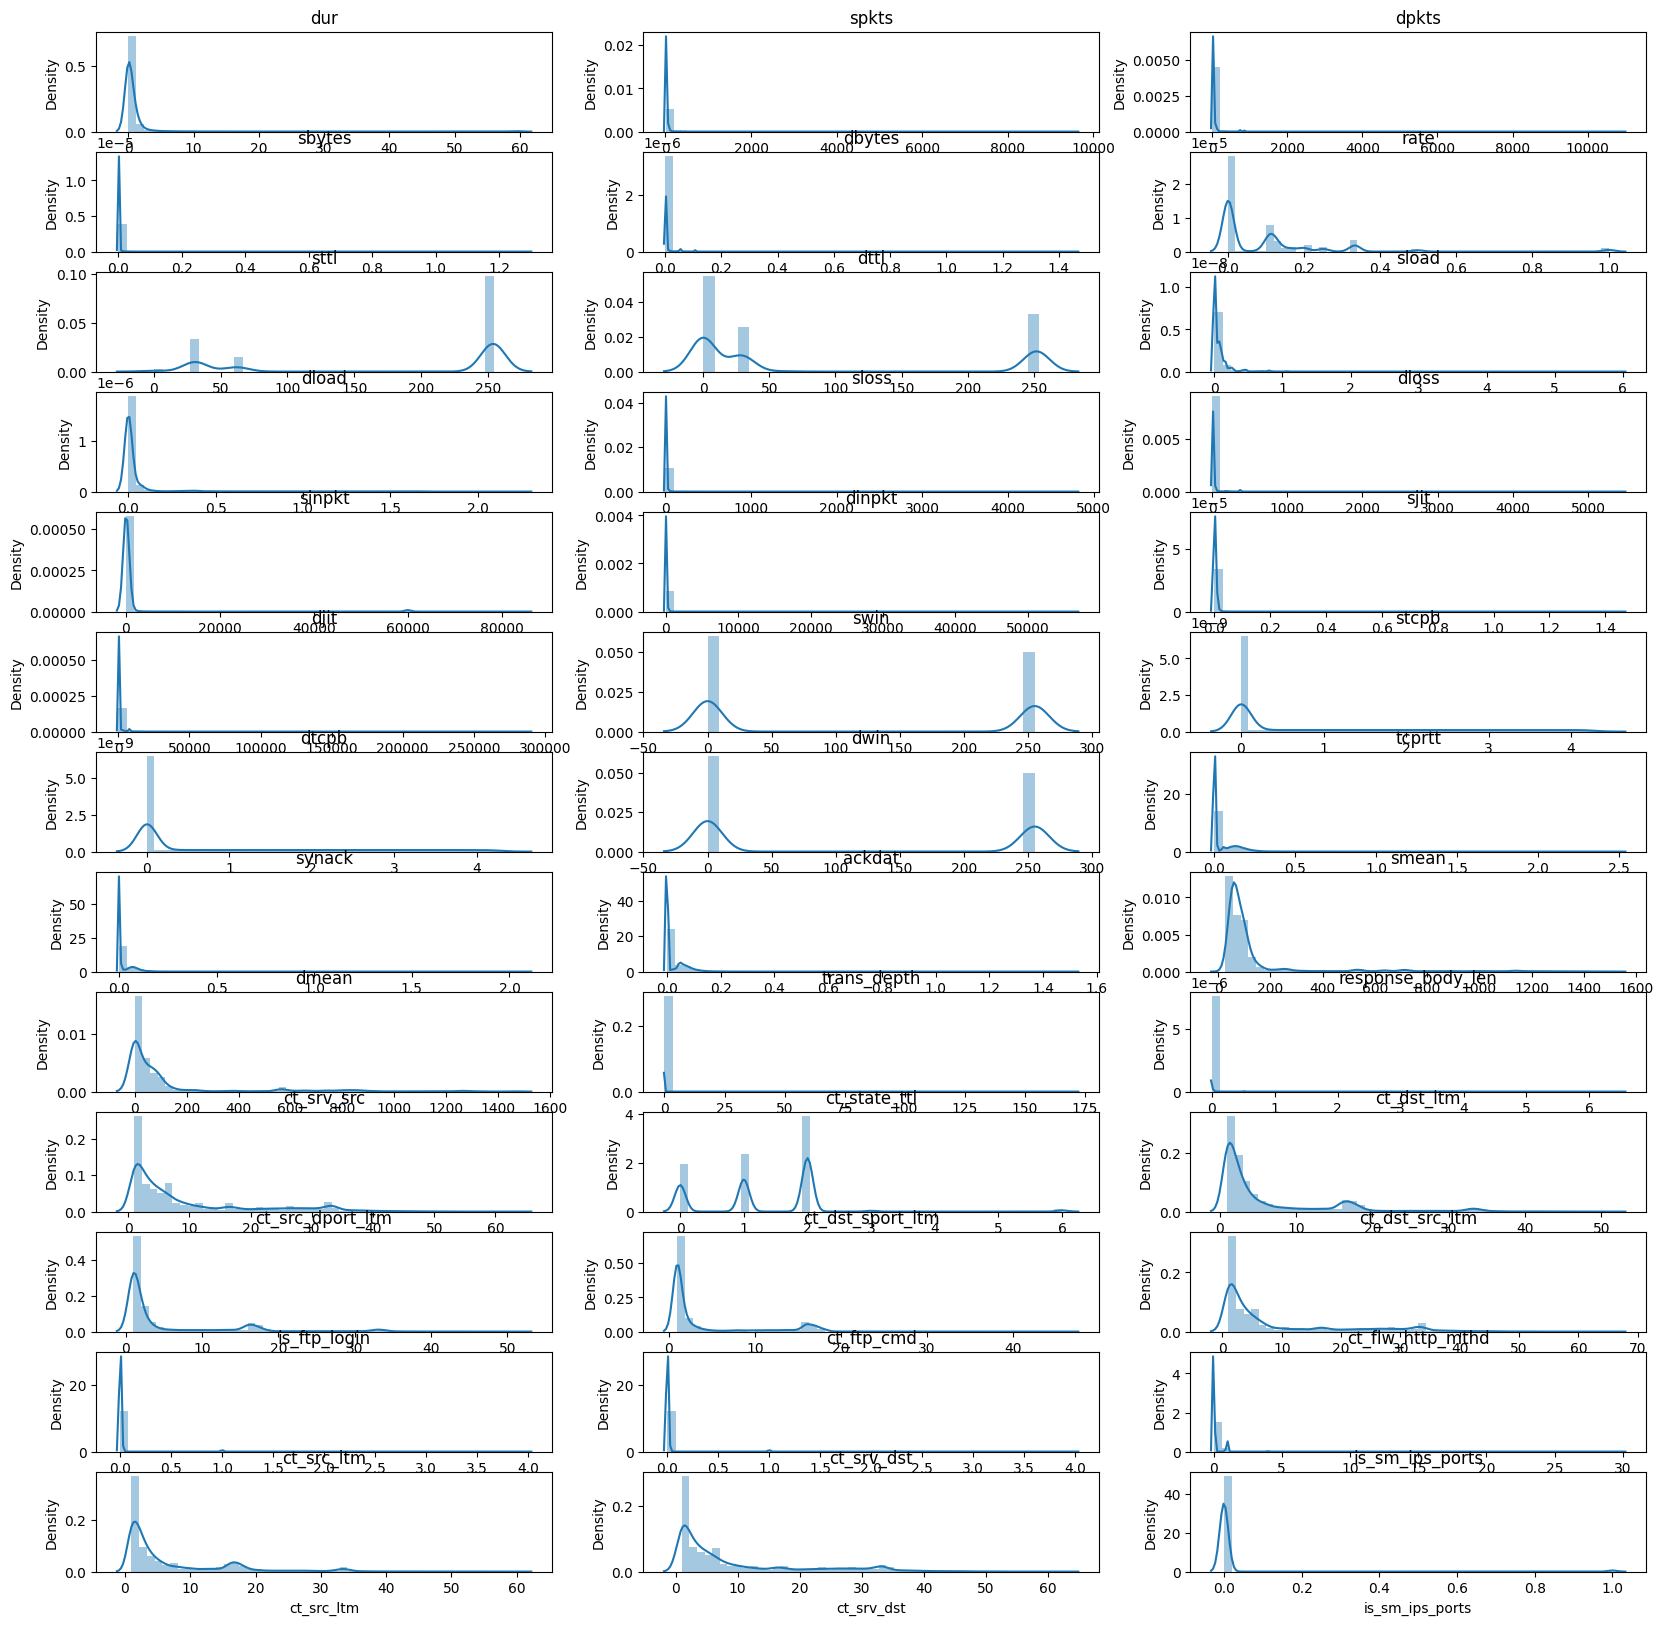

In [27]:
fig, axes = plt.subplots(nrows = 13, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)
cols=list(df_test.select_dtypes(include= np.number).columns)

for ax, col in zip(axes, cols):
    print()
    sns.distplot(df_test[col], ax = ax)
    ax.set_title(col)

In [28]:
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)
continuous_cols

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [29]:
continuous_cols_test=list(df_test.select_dtypes(include= np.number).columns)
continuous_cols_test

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [30]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)
categorical_cols

['proto', 'service', 'state', 'attack_cat']

In [31]:
categorical_cols_test=list(df_test.select_dtypes(exclude= np.number).columns)
categorical_cols_test

['proto', 'service', 'state', 'attack_cat']

In [32]:
for col in continuous_cols:
    print(df_train[col].skew(),"skewness in -->",col)

9.523750393344962 skewness in --> dur
47.74777707552023 skewness in --> spkts
49.30412707246661 skewness in --> dpkts
53.778545927853585 skewness in --> sbytes
52.55038692178041 skewness in --> dbytes
3.4994933511409823 skewness in --> rate
-0.69038131176919 skewness in --> sttl
0.575207788989881 skewness in --> dttl
9.488393212959751 skewness in --> sload
4.75390078634745 skewness in --> dload
52.46527652686876 skewness in --> sloss
54.465649114557564 skewness in --> dloss
9.274082197956785 skewness in --> sinpkt
23.01304608166282 skewness in --> dinpkt
15.349379672575278 skewness in --> sjit
60.56227475052681 skewness in --> djit
-0.09357394681367025 skewness in --> swin
0.9164472373882534 skewness in --> stcpb
0.9301372617910765 skewness in --> dtcpb
-0.01232882701939818 skewness in --> dwin
9.060343772576264 skewness in --> tcprtt
13.809682334769576 skewness in --> synack
9.628722345952289 skewness in --> ackdat
3.544111210752907 skewness in --> smean
3.1068392356522385 skewness in

In [33]:
for col in continuous_cols_test:
    print(df_test[col].skew(),"skewness in -->",col)

7.496060544592534 skewness in --> dur
40.21770262781216 skewness in --> spkts
36.764114389629526 skewness in --> dpkts
45.30344290011047 skewness in --> sbytes
39.760863679082696 skewness in --> dbytes
3.3194945898084494 skewness in --> rate
-0.6781092365887204 skewness in --> sttl
0.8950095892231043 skewness in --> dttl
8.703398789576552 skewness in --> sload
4.691217092888466 skewness in --> dload
44.75366181407537 skewness in --> sloss
41.38027007028287 skewness in --> dloss
7.917534921628944 skewness in --> sinpkt
29.67951203686419 skewness in --> dinpkt
17.65215718817733 skewness in --> sjit
29.543830440063015 skewness in --> djit
0.1770478121970468 skewness in --> swin
1.081121495532782 skewness in --> stcpb
1.0810171187072481 skewness in --> dtcpb
0.19681999607316308 skewness in --> dwin
4.038358803391814 skewness in --> tcprtt
5.786285648066837 skewness in --> synack
5.615605400717597 skewness in --> ackdat
3.72662255685938 skewness in --> smean
2.8261458622156623 skewness in -

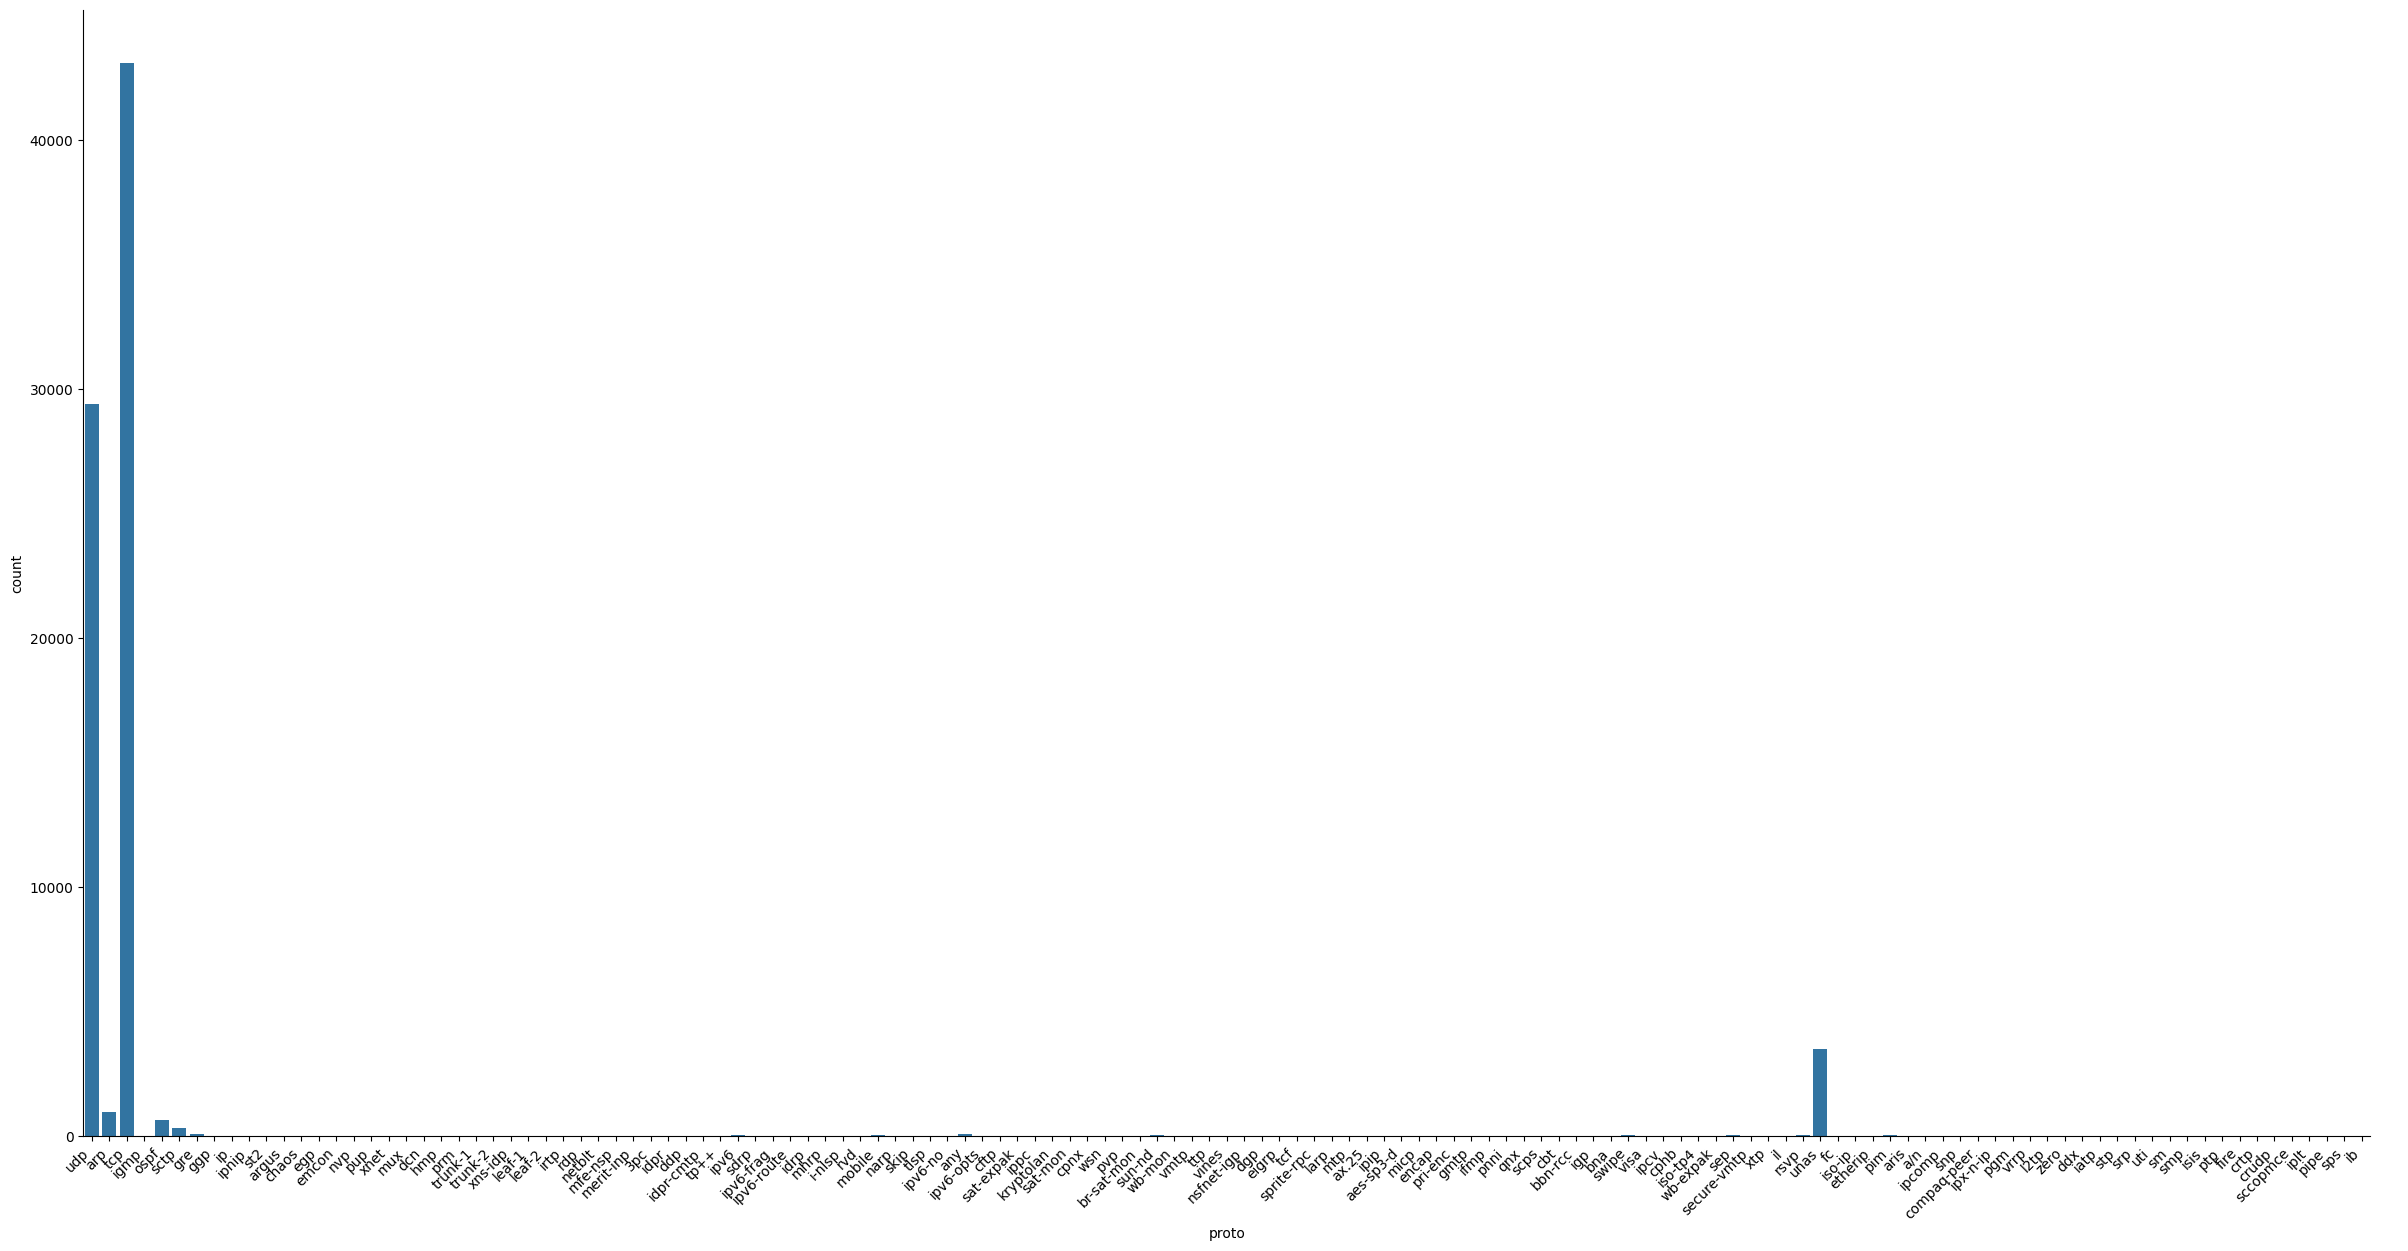

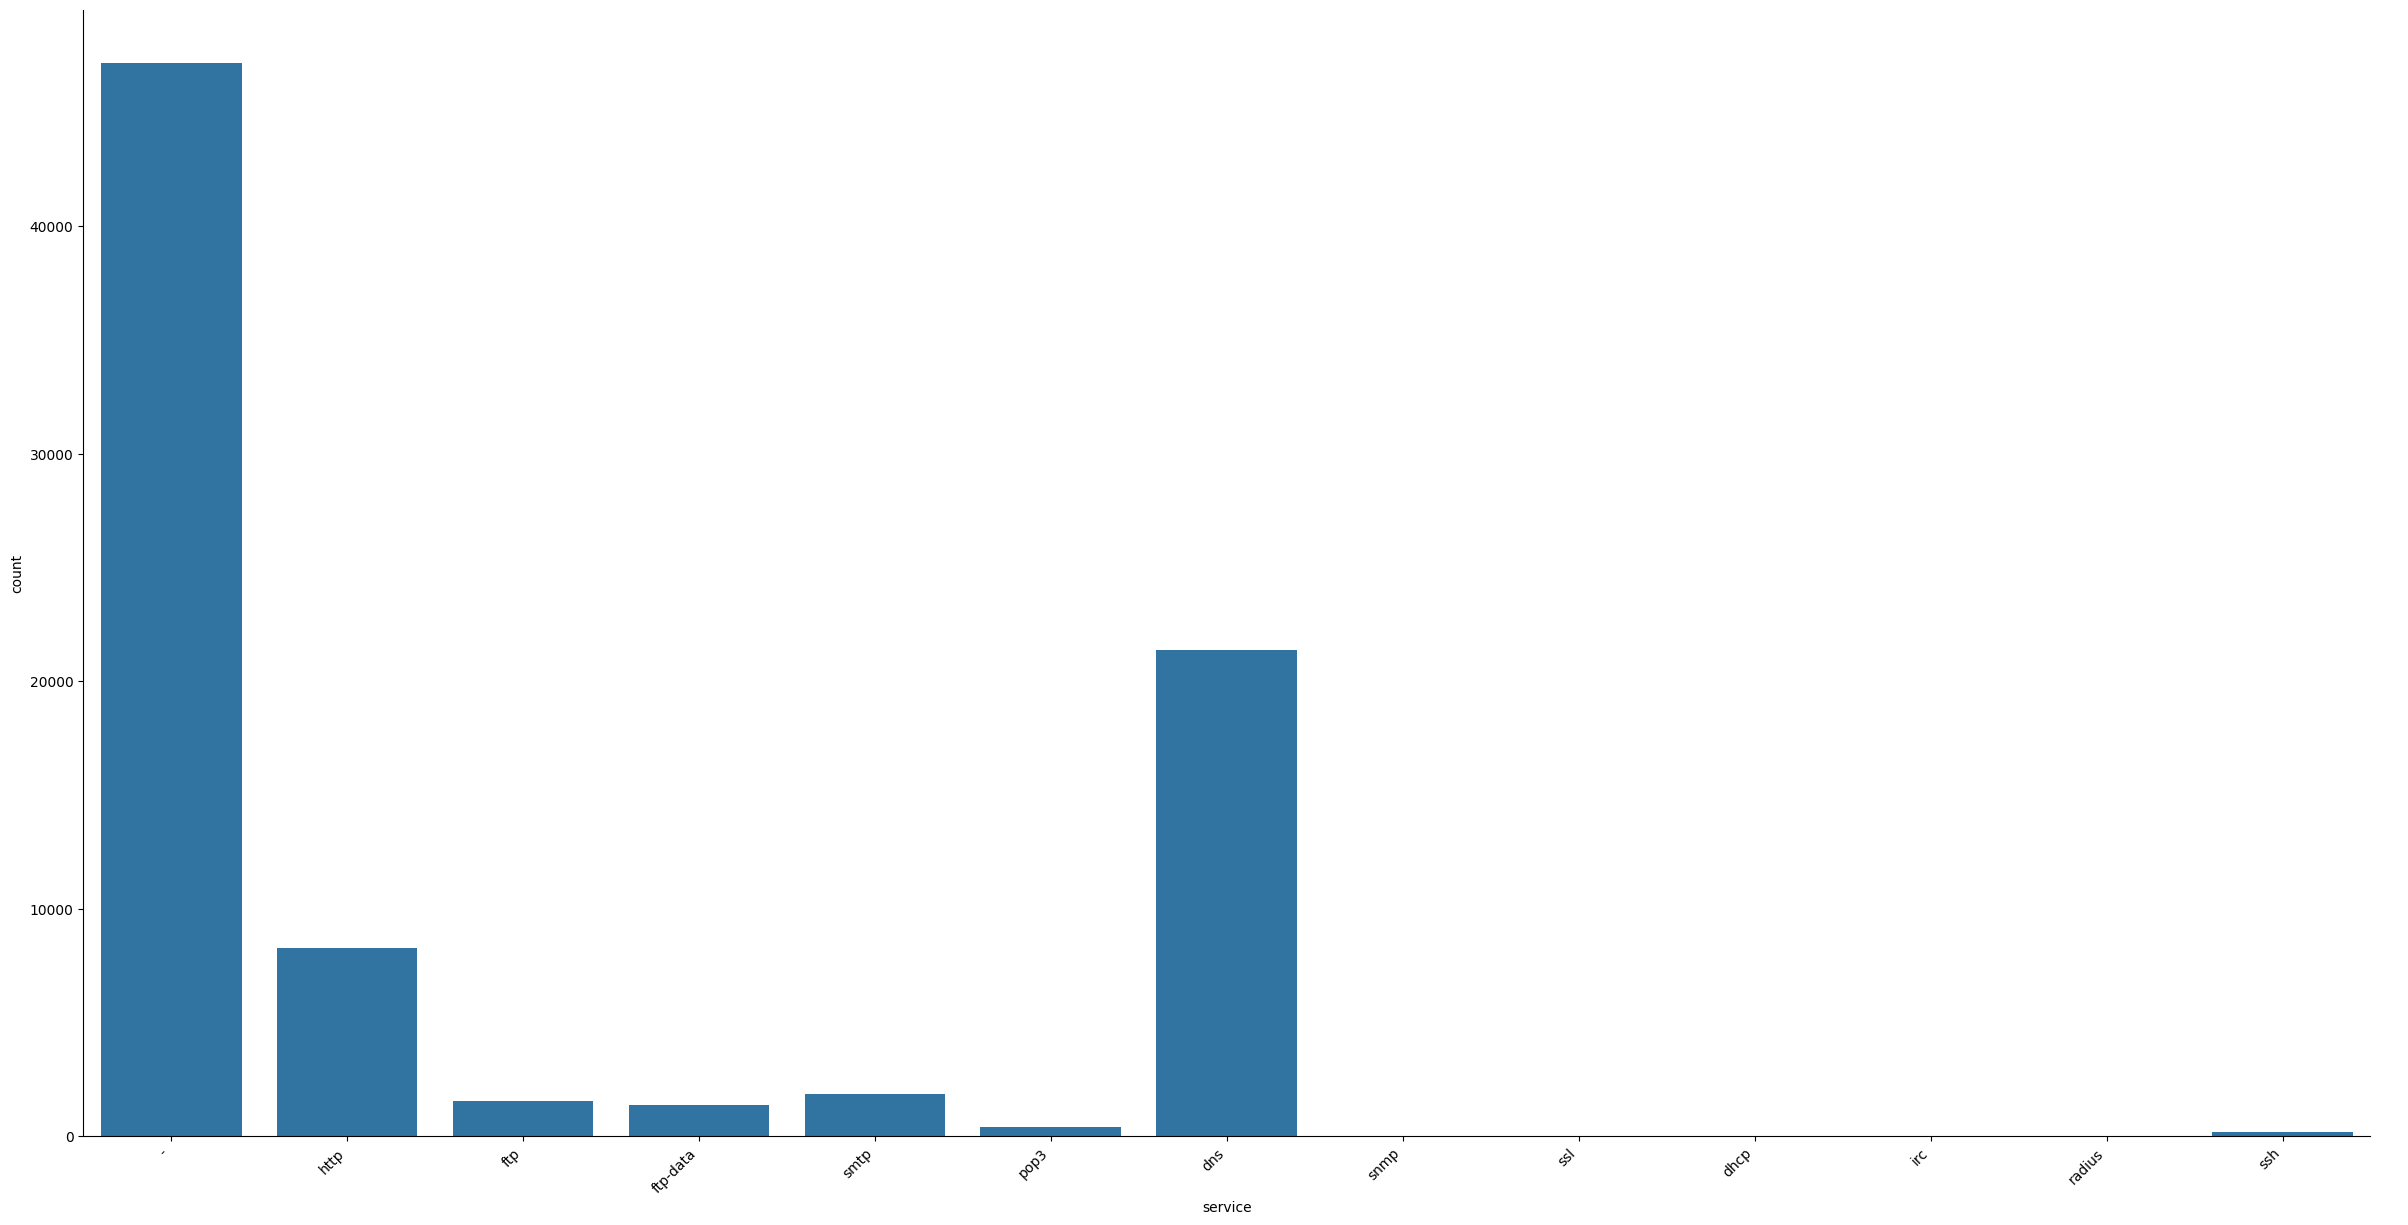

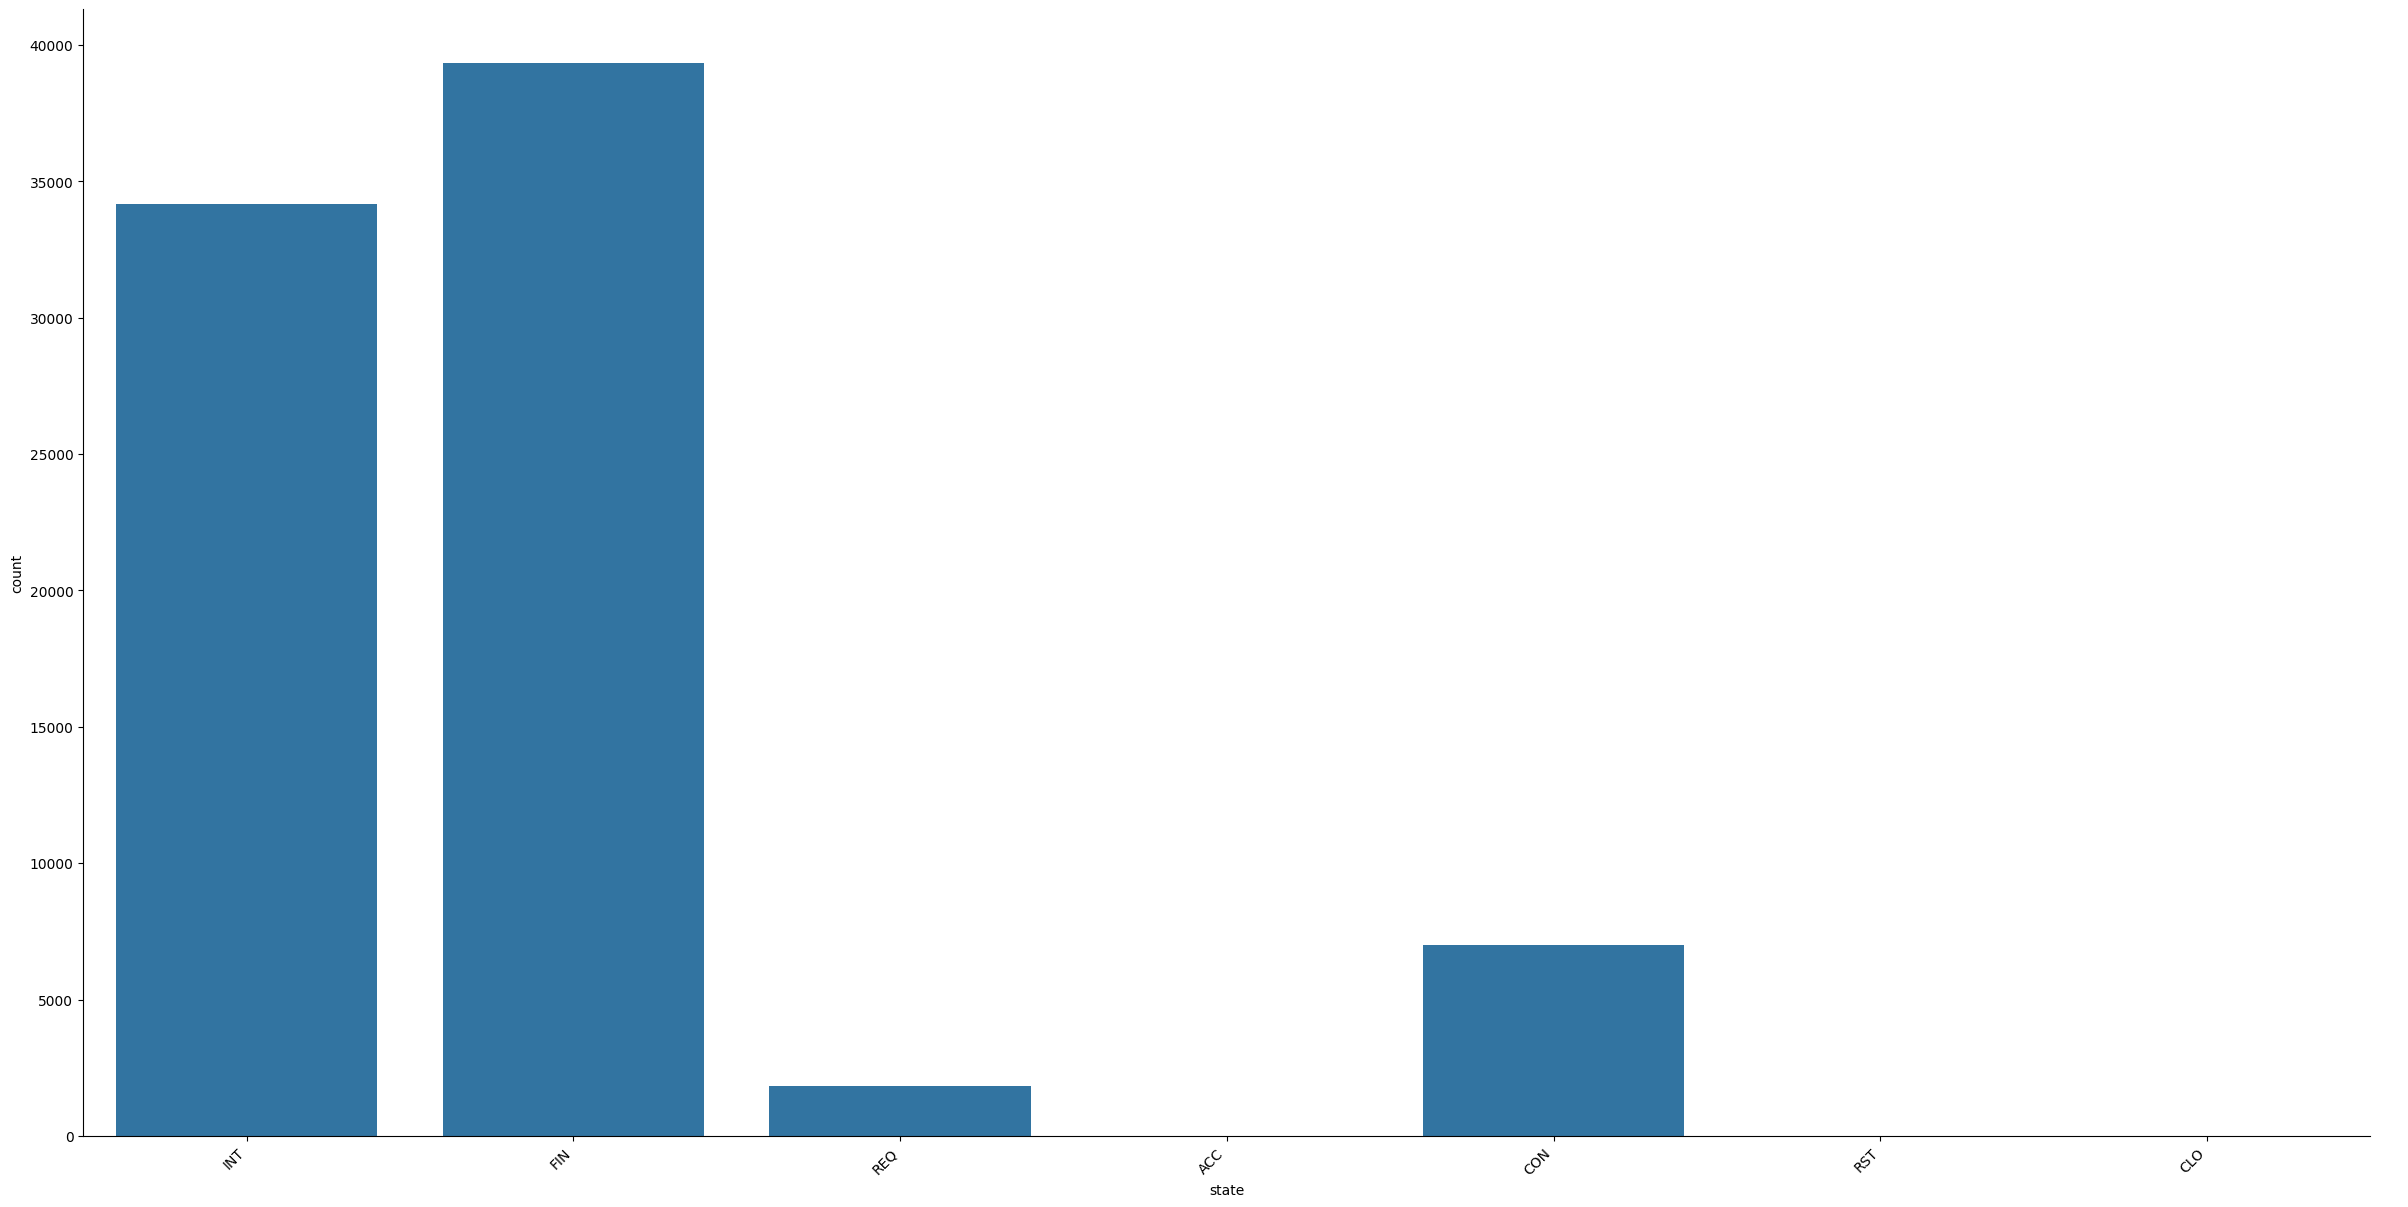

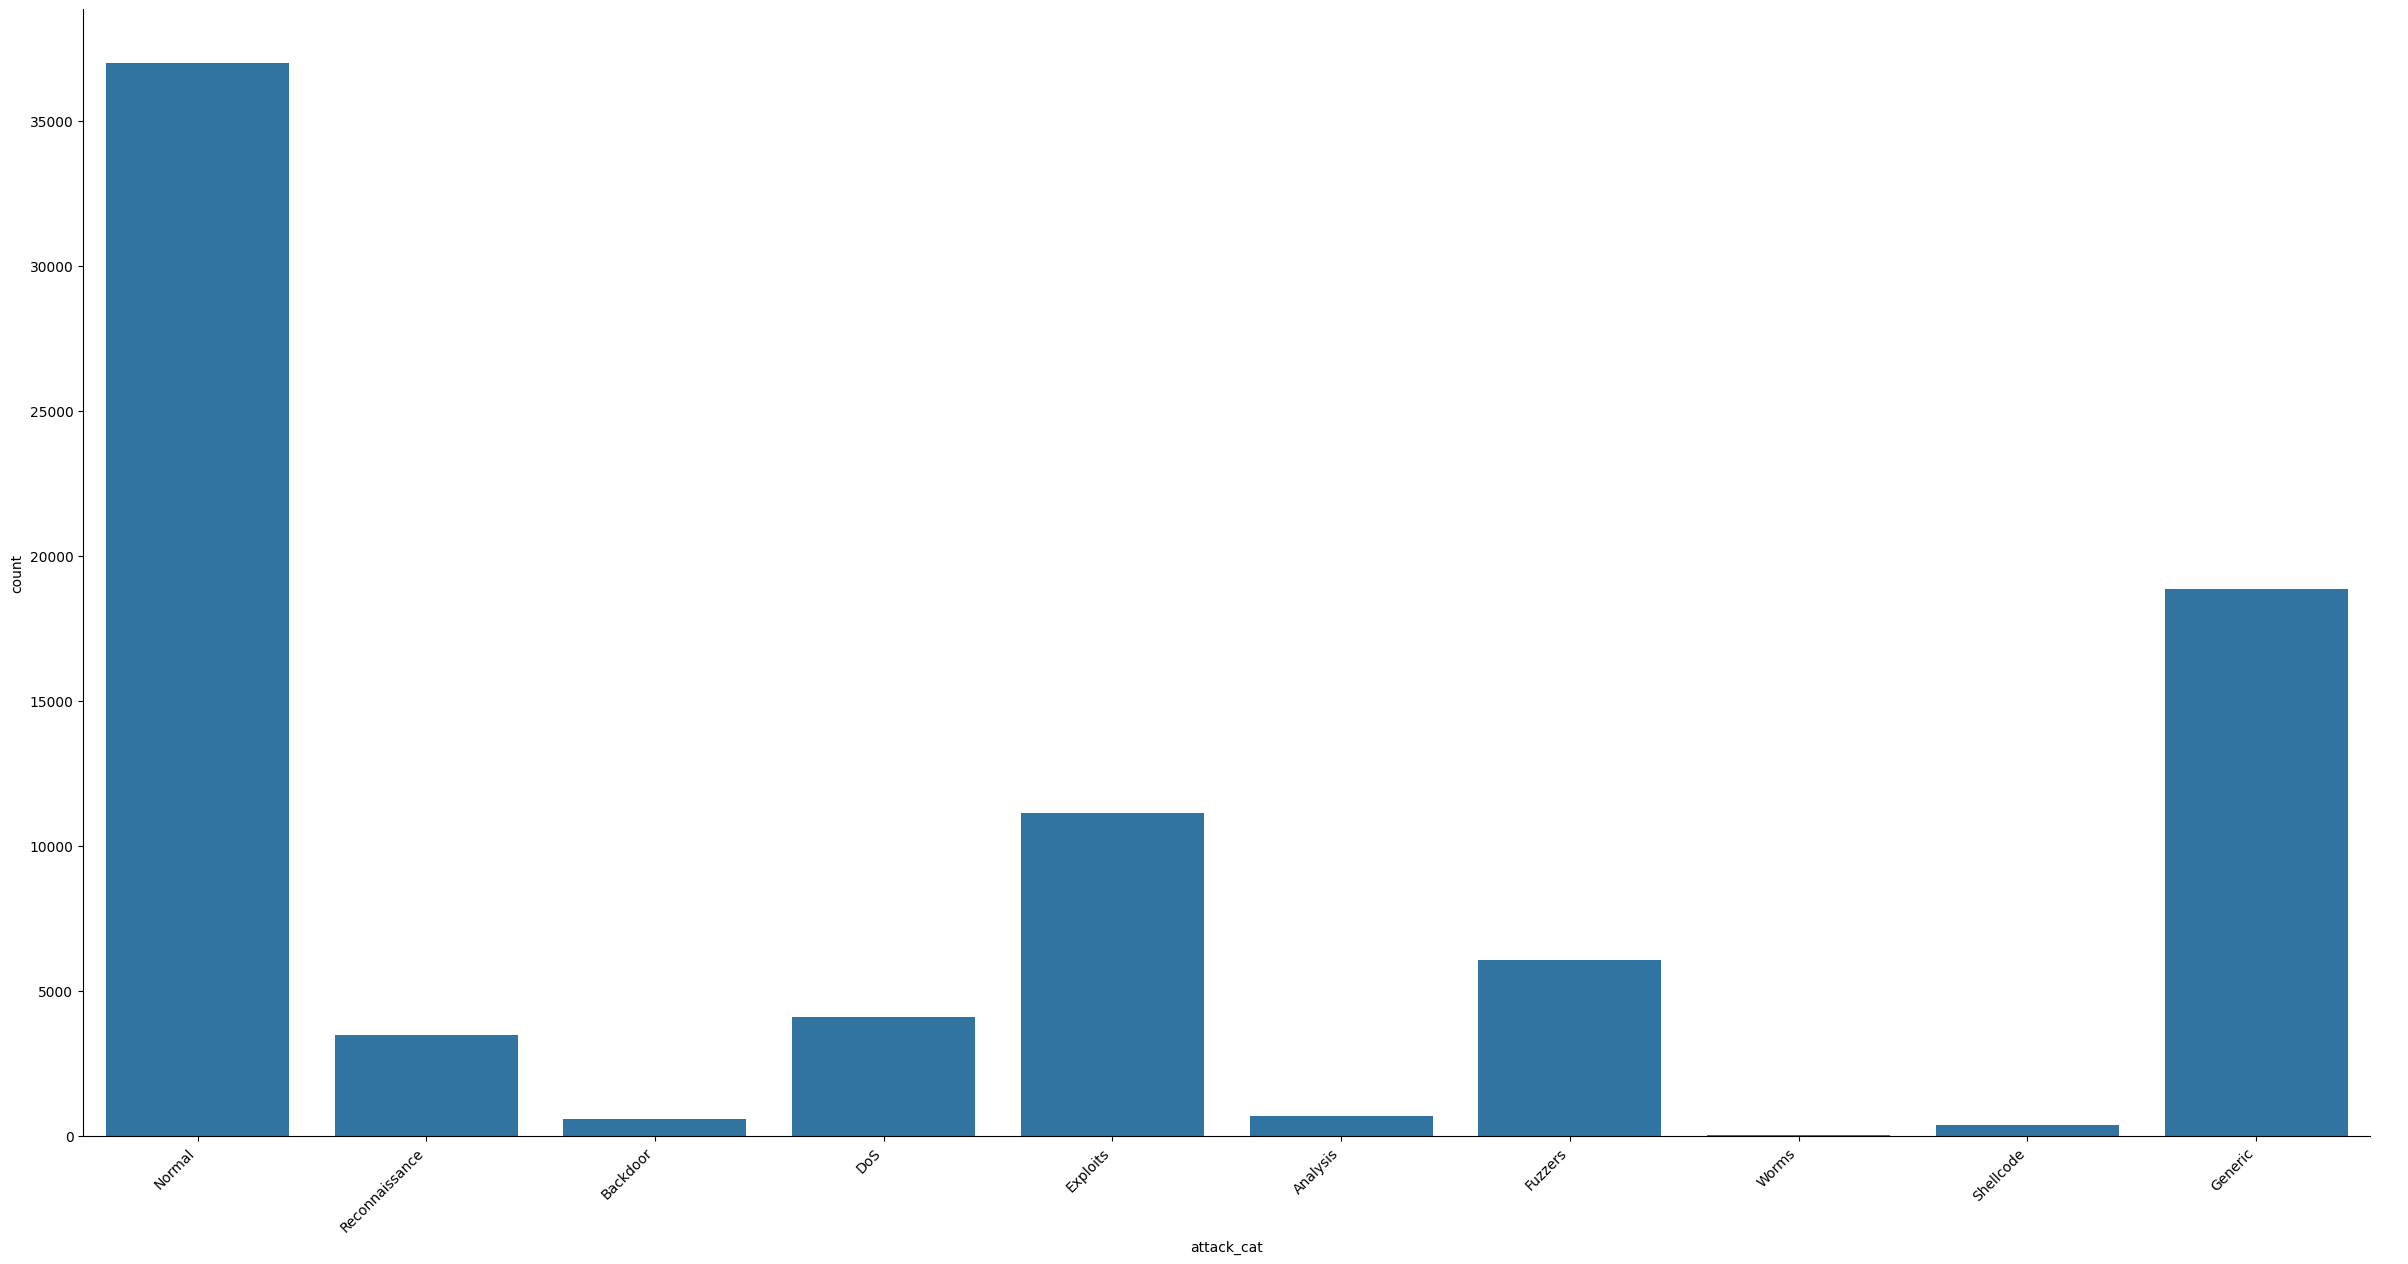

In [34]:
cat_columns = categorical_cols

height = len(cat_columns) * 3
aspect = 2

# Loop through each categorical column and create a plot
for col in cat_columns:
    sns.catplot(x=col, kind='count', data=df, height=height, aspect=aspect)
    plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better visibility
plt.show()

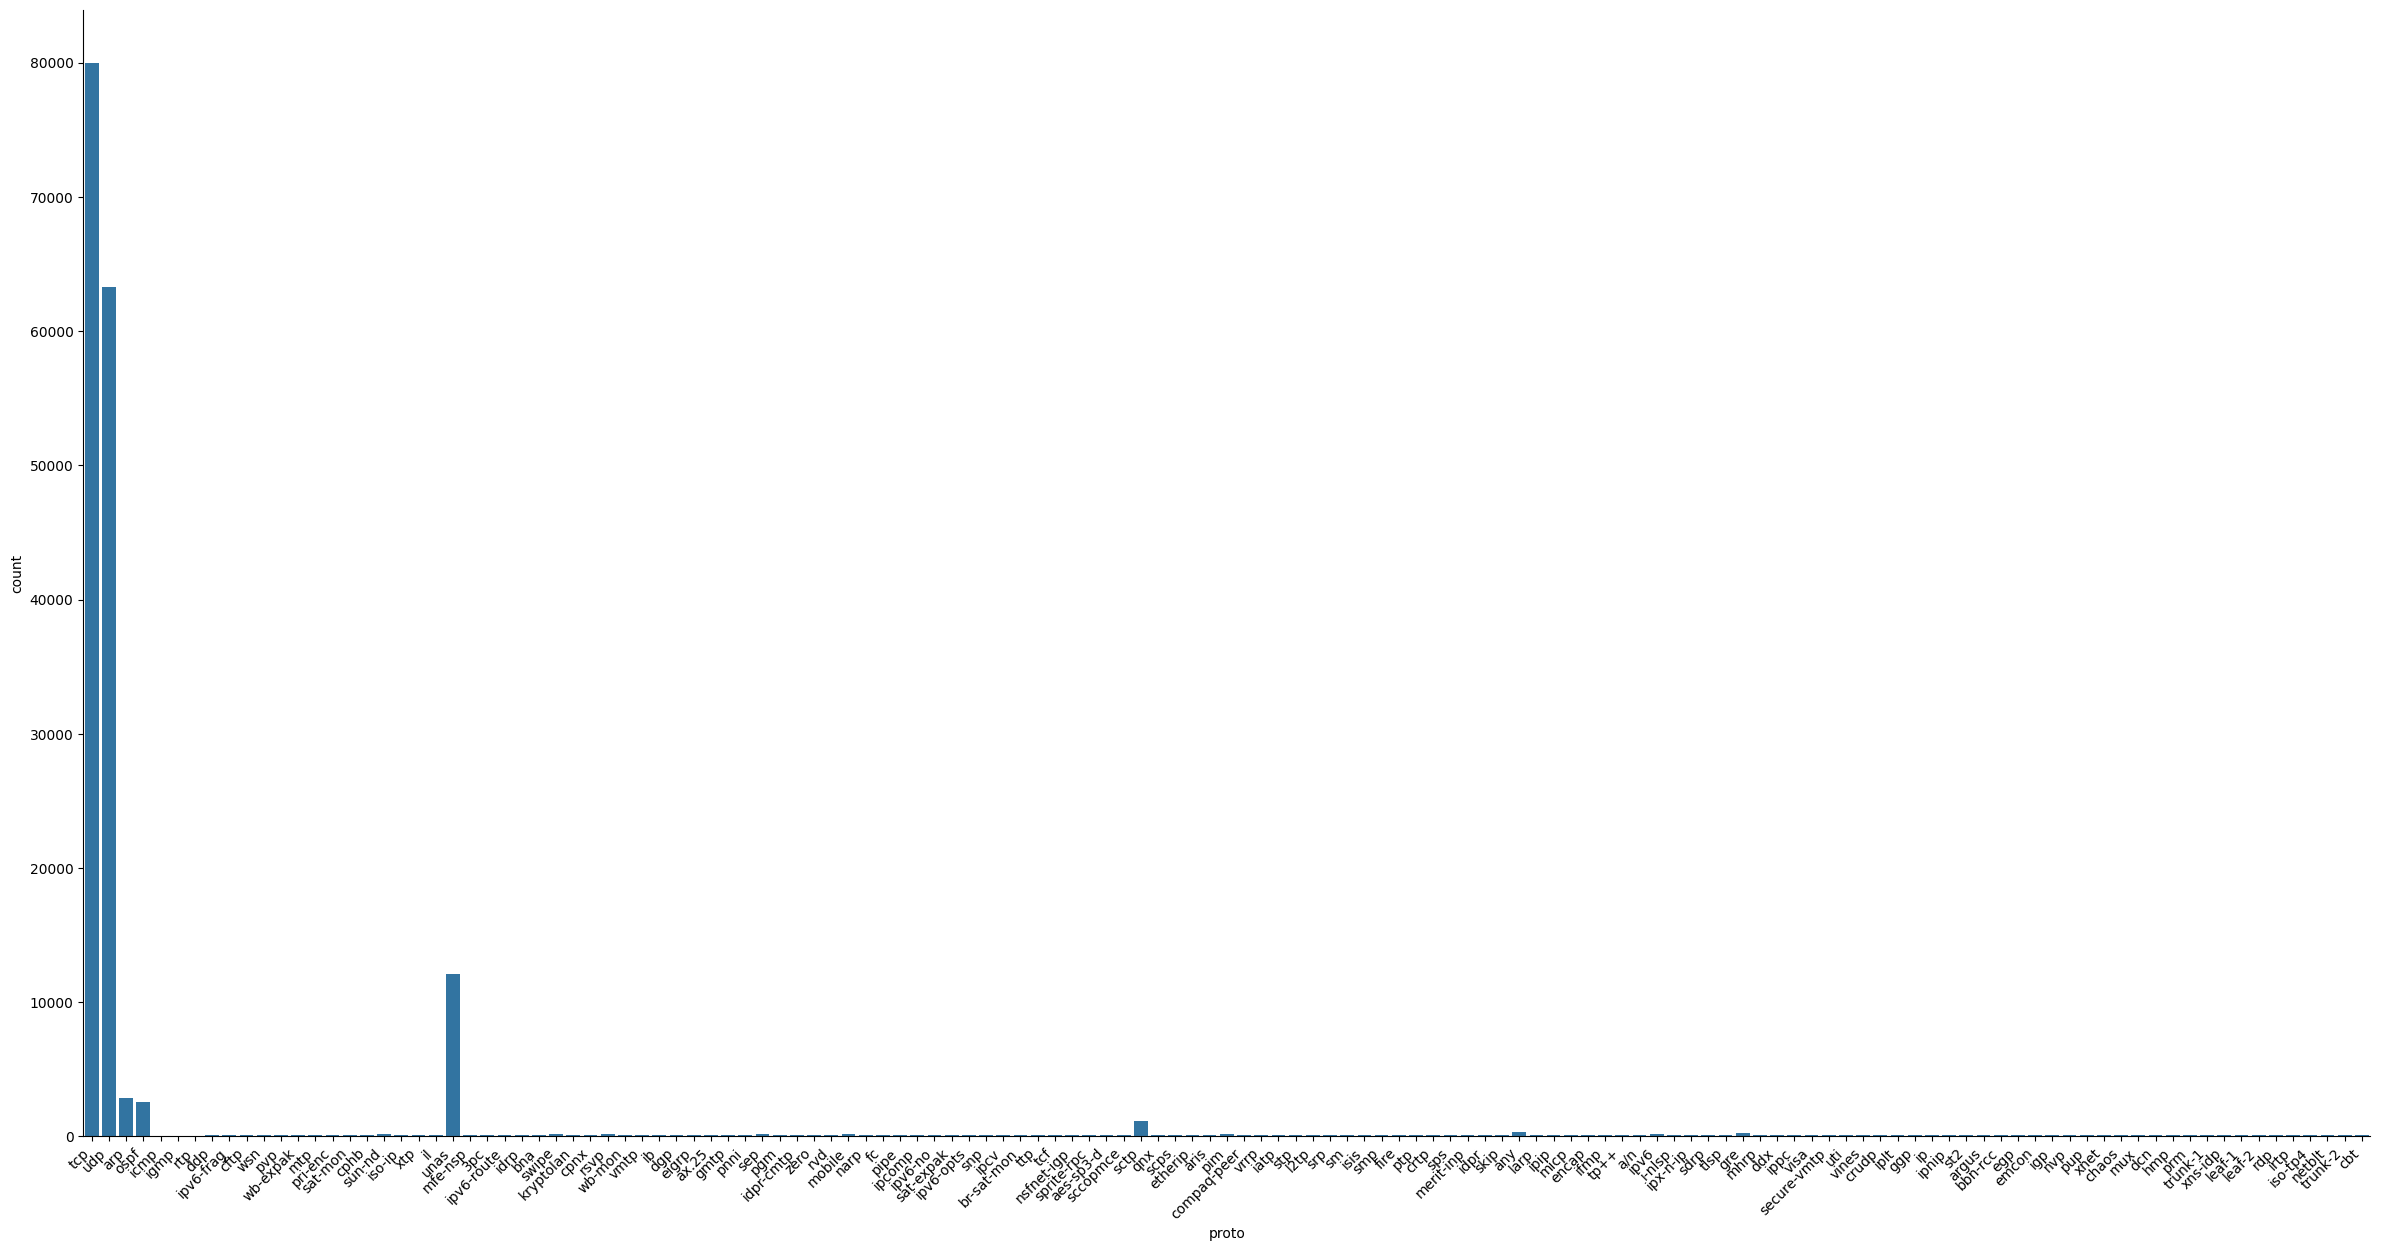

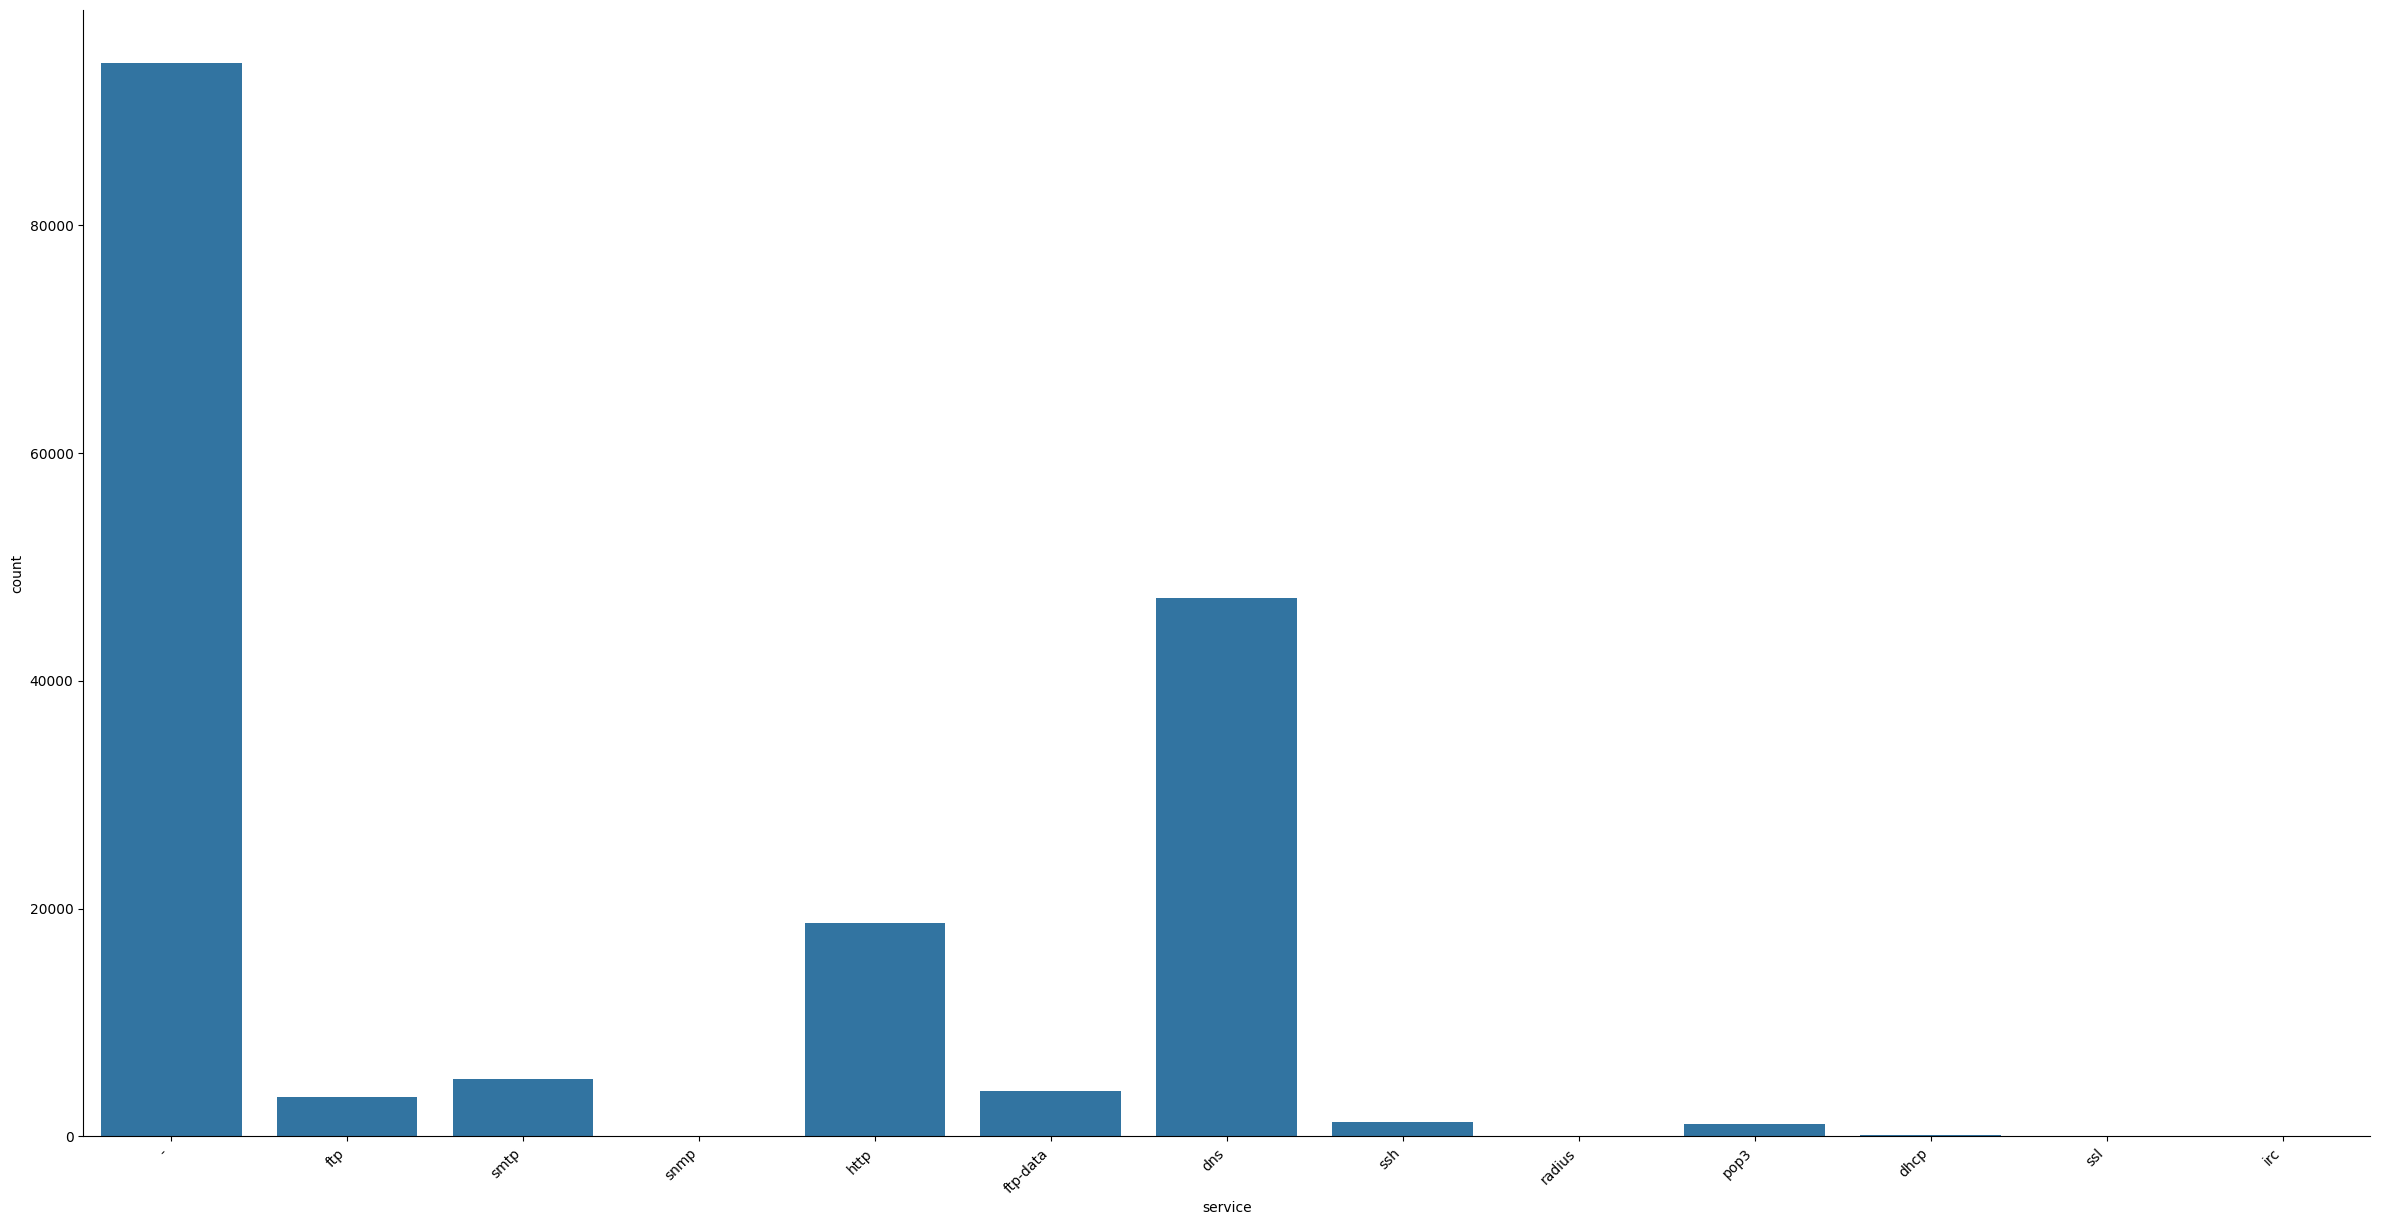

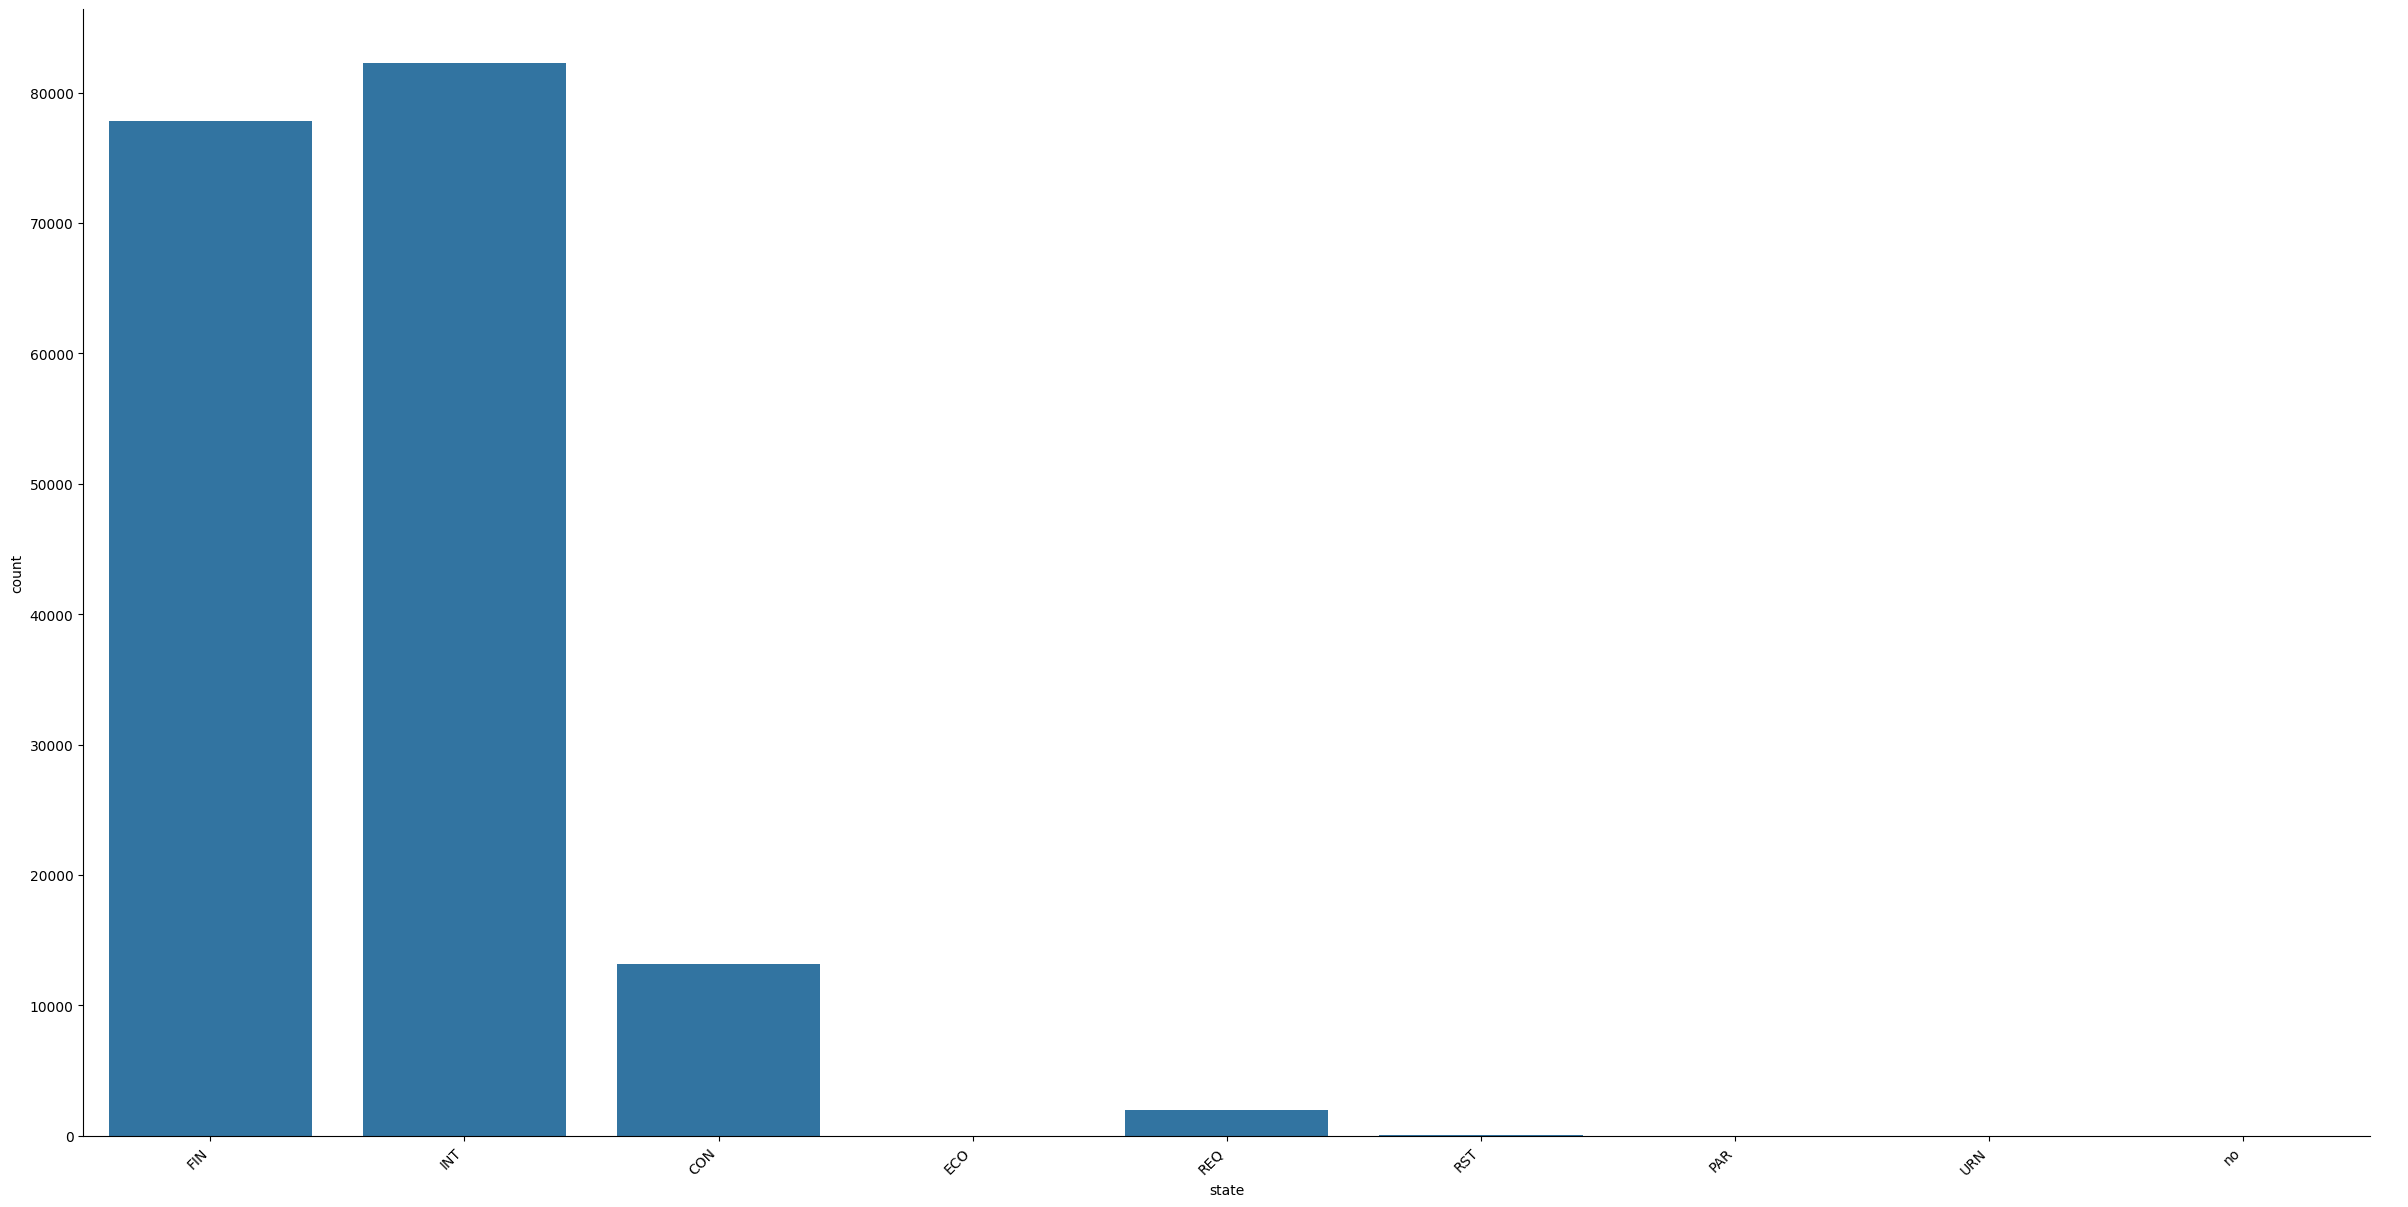

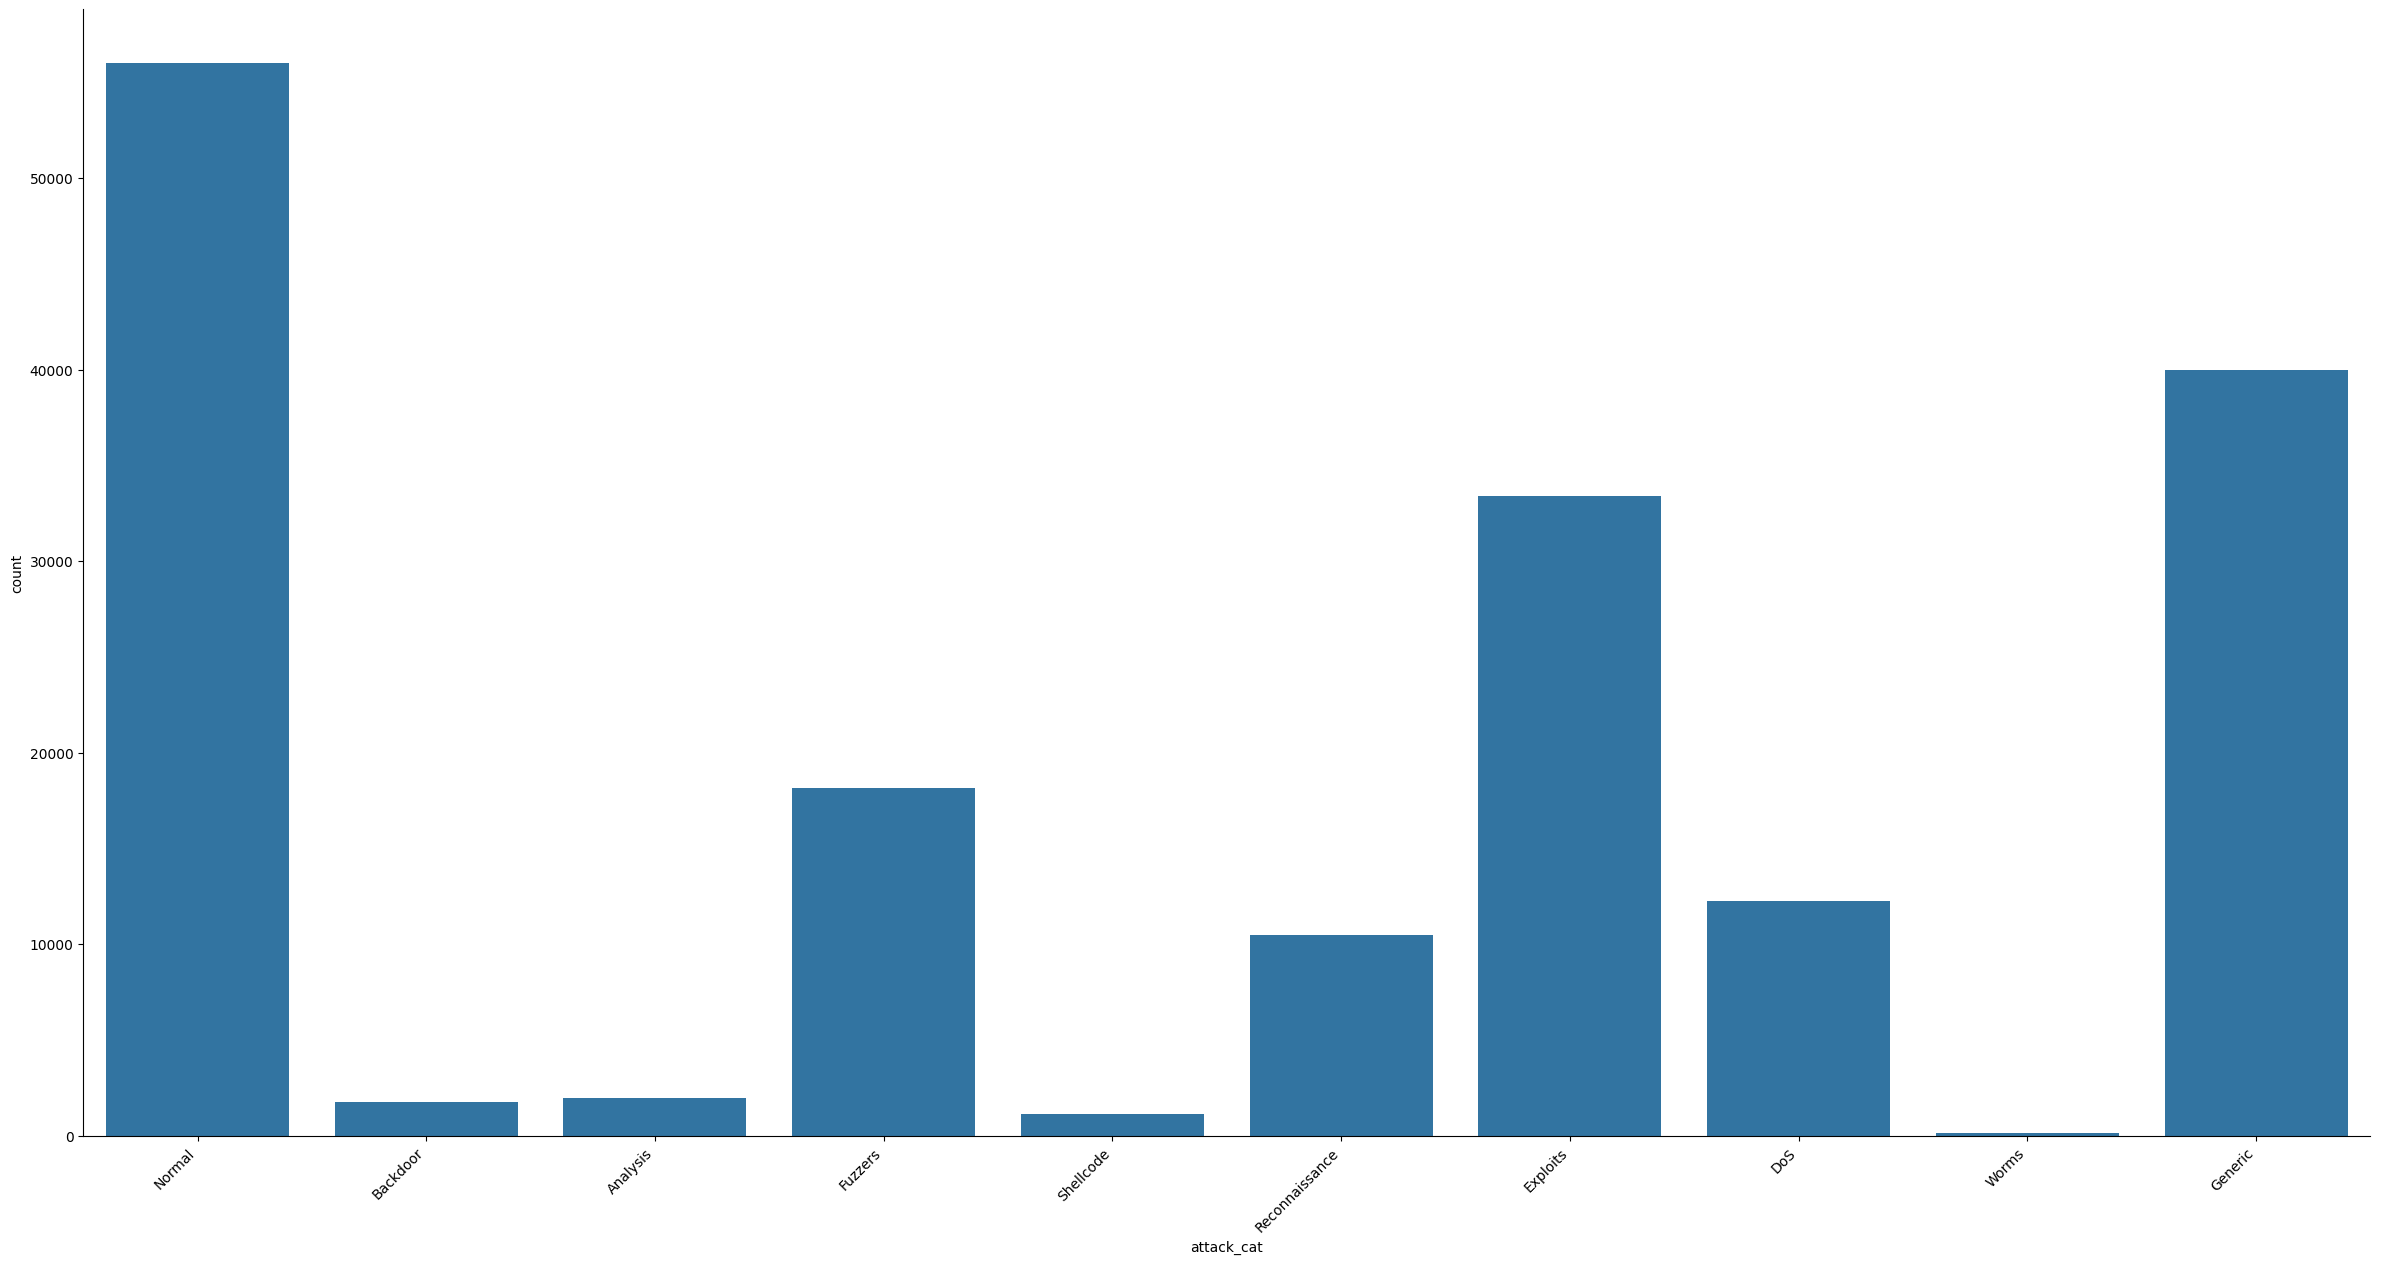

In [35]:
cat_columns = categorical_cols_test

height = len(cat_columns) * 3
aspect = 2

# Loop through each categorical column and create a plot
for col in cat_columns:
    sns.catplot(x=col, kind='count', data=df2, height=height, aspect=aspect)
    plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better visibility
plt.show()

In [36]:
output_col

label
0          0
1          0
2          0
3          0
4          0
...      ...
82327      0
82328      0
82329      0
82330      0
82331      0

[82332 rows x 1 columns]

Text(0.5, 1.0, 'Count of categories in the label')

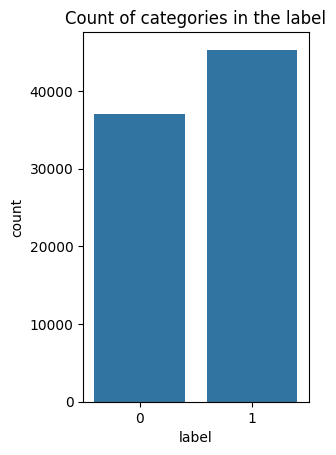

In [37]:
plt.subplot(1,2,1)
sns.countplot(x = 'label' , data= output_col) 
plt.title("Count of categories in the label")

Text(0.5, 1.0, 'Count of categories in the label')

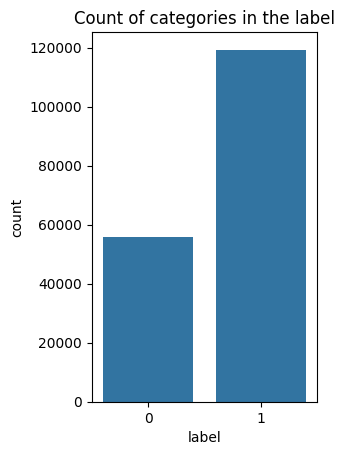

In [38]:
plt.subplot(1,2,1)
sns.countplot(x = 'label' , data= output_col_test) 
plt.title("Count of categories in the label")

In [39]:
col = continuous_cols
df_train[col].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

dur         spkts         dpkts        sbytes        dbytes  \
count  82332.000000  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean       1.006756     18.666472     17.545936  7.993908e+03  1.323379e+04   
std        4.710444    133.916353    115.574086  1.716423e+05  1.514715e+05   
min        0.000000      1.000000      0.000000  2.400000e+01  0.000000e+00   
25%        0.000008      2.000000      0.000000  1.140000e+02  0.000000e+00   
50%        0.014138      6.000000      2.000000  5.340000e+02  1.780000e+02   
75%        0.719360     12.000000     10.000000  1.280000e+03  9.560000e+02   
95%        2.403792     60.000000     54.000000  1.247200e+04  3.062200e+04   
97%        4.152776     84.000000     86.000000  3.107263e+04  5.922400e+04   
99%       22.048290    208.000000    252.000000  6.997004e+04  2.077510e+05   
max       59.999989  10646.000000  11018.000000  1.435577e+07  1.465753e+07   

               rate          sttl          dttl         sload         dload  \
count  8.233200e+04  82332.000000  82332.000000  8.233200e+04  8.233200e+04   
mean   8.241089e+04    180.967667     95.713003  6.454902e+07  6.305470e+05   
std    1.486204e+05    101.513358    116.667722  1.798618e+08  2.393001e+06   
min    0.000000e+00      0.000000      0.000000  0.000000e+00  0.000000e+00   
25%    2.860611e+01     62.000000      0.000000  1.120247e+04  0.000000e+00   
50%    2.650177e+03    254.000000     29.000000  5.770032e+05  2.112951e+03   
75%    1.111111e+05    254.000000    252.000000  6.514286e+07  1.585808e+04   
95%    3.333333e+05    254.000000    252.000000  2.666667e+08  3.741446e+06   
97%    3.333333e+05    254.000000    252.000000  4.256000e+08  9.045203e+06   
99%    1.000000e+06    254.000000    252.000000  8.000000e+08  1.418087e+07   
max    1.000000e+06    255.000000    253.000000  5.268000e+09  2.082111e+07   

       ...    ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
count  ...  82332.000000      82332.000000      82332.000000    82332.000000   
mean   ...      5.744923          4.928898          3.663011        7.456360   
std    ...      8.418112          8.389545          5.915386       11.415191   
min    ...      1.000000          1.000000          1.000000        1.000000   
25%    ...      1.000000          1.000000          1.000000        1.000000   
50%    ...      2.000000          1.000000          1.000000        3.000000   
75%    ...      6.000000          4.000000          3.000000        6.000000   
95%    ...     25.000000         25.000000         18.000000       37.000000   
97%    ...     32.000000         32.000000         24.000000       41.000000   
99%    ...     43.000000         43.000000         25.000000       46.000000   
max    ...     59.000000         59.000000         38.000000       63.000000   

       is_ftp_login    ct_ftp_cmd  ct_flw_http_mthd    ct_src_ltm  \
count  82332.000000  82332.000000      82332.000000  82332.000000   
mean       0.008284      0.008381          0.129743      6.468360   
std        0.091171      0.092485          0.638683      8.543927   
min        0.000000      0.000000          0.000000      1.000000   
25%        0.000000      0.000000          0.000000      1.000000   
50%        0.000000      0.000000          0.000000      3.000000   
75%        0.000000      0.000000          0.000000      7.000000   
95%        0.000000      0.000000          1.000000     25.000000   
97%        0.000000      0.000000          1.000000     32.000000   
99%        0.000000      0.000000          1.000000     43.000000   
max        2.000000      2.000000         16.000000     60.000000   

         ct_srv_dst  is_sm_ips_ports  
count  82332.000000     82332.000000  
mean       9.164262         0.011126  
std       11.121413         0.104891  
min        1.000000         0.000000  
25%        2.000000         0.000000  
50%        5.000000         0.000000  
75%       11.000000         0.000000  
95%       36.000

In [40]:
col = continuous_cols_test
df_test[col].describe(percentiles = [.25,.5,.75,.95,.97,.99])  

dur          spkts          dpkts        sbytes  \
count  175341.000000  175341.000000  175341.000000  1.753410e+05   
mean        1.359389      20.298664      18.969591  8.844844e+03   
std         6.480249     136.887597     110.258271  1.747656e+05   
min         0.000000       1.000000       0.000000  2.800000e+01   
25%         0.000008       2.000000       0.000000  1.140000e+02   
50%         0.001582       2.000000       2.000000  4.300000e+02   
75%         0.668069      12.000000      10.000000  1.418000e+03   
95%         3.079511      64.000000      62.000000  1.366200e+04   
97%         6.490931      90.000000      80.000000  3.498840e+04   
99%        45.353334     234.000000     400.000000  7.412540e+04   
max        59.999989    9616.000000   10974.000000  1.296523e+07   

             dbytes          rate           sttl           dttl         sload  \
count  1.753410e+05  1.753410e+05  175341.000000  175341.000000  1.753410e+05   
mean   1.492892e+04  9.540619e+04     179.546997      79.609567  7.345403e+07   
std    1.436542e+05  1.654010e+05     102.940011     110.506863  1.883574e+08   
min    0.000000e+00  0.000000e+00       0.000000       0.000000  0.000000e+00   
25%    0.000000e+00  3.278614e+01      62.000000       0.000000  1.305334e+04   
50%    1.640000e+02  3.225807e+03     254.000000      29.000000  8.796748e+05   
75%    1.102000e+03  1.250000e+05     254.000000     252.000000  8.888889e+07   
95%    3.907600e+04  3.333333e+05     254.000000     252.000000  2.666667e+08   
97%    5.946000e+04  5.000000e+05     254.000000     252.000000  4.560000e+08   
99%    4.743678e+05  1.000000e+06     254.000000     252.000000  8.000000e+08   
max    1.465555e+07  1.000000e+06     255.000000     254.000000  5.988000e+09   

              dload  ...     ct_dst_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  \
count  1.753410e+05  ...  175341.000000     175341.000000     175341.000000   
mean   6.712056e+05  ...       6.193936          5.383538          4.206255   
std    2.421312e+06  ...       8.052476          8.047104          5.783585   
min    0.000000e+00  ...       1.000000          1.000000          1.000000   
25%    0.000000e+00  ...       1.000000          1.000000          1.000000   
50%    1.447023e+03  ...       2.000000          1.000000          1.000000   
75%    2.784487e+04  ...       7.000000          5.000000          3.000000   
95%    4.071050e+06  ...      24.000000         22.000000         17.000000   
97%    8.413857e+06  ...      32.000000         32.000000         17.000000   
99%    1.465589e+07  ...      34.000000         34.000000         18.000000   
max    2.242273e+07  ...      51.000000         51.000000         46.000000   

       ct_dst_src_ltm   is_ftp_login     ct_ftp_cmd  ct_flw_http_mthd  \
count   175341.000000  175341.000000  175341.000000     175341.000000   
mean         8.729881       0.014948       0.014948          0.133066   
std         10.956186       0.126048       0.126048          0.701208   
min          1.000000       0.000000       0.000000          0.000000   
25%          1.000000       0.000000       0.000000          0.000000   
50%          3.000000       0.000000       0.000000          0.000000   
75%         12.000000       0.000000       0.000000          0.000000   
95%         33.000000       0.000000       0.000000          1.000000   
97%         34.000000       0.000000       0.000000          1.000000   
99%         41.000000       1.000000       1.000000          1.000000   
max         65.000000       4.000000       4.000000         30.000000   

          ct_src_ltm     ct_srv_dst  is_sm_ips_ports  
count  175341.000000  175341.000000    175341.000000  
mean        6.955789       9.100758         0.015752  
std         8.321493      10.756952         0.124516  
min         1.000000       1.000000         0.000000  
25%         2.000000       2.000000         0.000000  
50%         3.000000       4.000000         0.000000  
75%         9.00


## Modifications in Dataset starts from here . It will only be done for train dataset not for test dataset

### As seen from EDA there are some parameters that needs to be rectified .

1. As we have seen that there are no null values in our dataset so its a big relief as of now.

In [41]:
df_train.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
dtype: int6

In [42]:
def fill_null_values(for_numerical_cols:str,for_categorical_cols:str,df_train):
    for cols in df_train.columns:
        if df_train[cols].dtype==int or df_train[cols].dtype==float:
            if for_numerical_cols=="median":
                median_=df_train[cols].median()
                df_train[cols].fillna(median_,inplace=True)
       
            elif for_numerical_cols=="mode":
                mode_=df_train[cols].mode()[0]
                df_train[cols].fillna(mode_,inplace=True)
        elif df_train[cols].dtype=="object":
            if for_categorical_cols=="most_frequent":
                d=list(df_train[cols].value_counts().index) # most frequent
                df_train[cols].fillna(d[0],inplace=True)

In [43]:
fill_null_values(for_numerical_cols="median",for_categorical_cols="most_frequent",df_train=df_train)

In [44]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [45]:
df_train=pd.concat([output_col,df_train],axis=1) # since rows will be deleted here

In [46]:
# Outlier delete

for col in continuous_cols:
    q1=df_train[col].quantile(0.25)
    q3=df_train[col].quantile(0.75)
    iqr=q3-q1
    l=q1-1.5*iqr
    h=q3+1.5*iqr
    print(f"Range of {col} is given below")
    print("[",l,",",h,"]")
    print()
    df_train = df_train[(df_train[col] <= h)] 
    df_train = df_train[(df_train[col] >=l)] 

Range of dur is given below
[ -1.079020375 , 1.798388625 ]

Range of spkts is given below
[ -10.0 , 22.0 ]

Range of dpkts is given below
[ -12.0 , 20.0 ]

Range of sbytes is given below
[ -972.0 , 1924.0 ]

Range of dbytes is given below
[ -531.0 , 885.0 ]

Range of rate is given below
[ -249905.05742499998 , 416609.691735 ]

Range of sttl is given below
[ 254.0 , 254.0 ]

Range of dttl is given below
[ -378.0 , 630.0 ]

Range of sload is given below
[ -149963676.11998752 , 249978205.6719925 ]

Range of dload is given below
[ -3716.901489 , 6194.835815 ]

Range of sloss is given below
[ -3.0 , 5.0 ]

Range of dloss is given below
[ -1.5 , 2.5 ]

Range of sinpkt is given below
[ -50.443999500000004 , 84.08933250000001 ]

Range of dinpkt is given below
[ 0.0 , 0.0 ]

Range of sjit is given below
[ 0.0 , 0.0 ]

Range of djit is given below
[ 0.0 , 0.0 ]

Range of swin is given below
[ 0.0 , 0.0 ]

Range of stcpb is given below
[ 0.0 , 0.0 ]

Range of dtcpb is given below
[ 0.0 , 0.0 ]

R

In [47]:

output_col=pd.DataFrame(df_train['label'])
df_train.drop("label",axis=1,inplace=True)

In [48]:
df_train

dur proto service state  spkts  dpkts  sbytes  dbytes  \
21     0.000009   udp       -   INT      2      0     202       0   
205    0.000009   udp       -   INT      2      0     104       0   
218    0.000004  igmp       -   INT      2      0      90       0   
222    0.000004  igmp       -   INT      2      0      90       0   
234    0.000003   udp       -   INT      2      0     104       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82324  0.000006   udp       -   INT      2      0     104       0   
82325  0.000010   udp       -   INT      2      0     104       0   
82326  0.000009   udp       -   INT      2      0     104       0   
82327  0.000005   udp       -   INT      2      0     104       0   
82331  0.000009   udp       -   INT      2      0     104       0   

              rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
21     111111.1072   254  ...                 1                 1   
205    111111.1072   254  ...                 1                 1   
218    250000.0006   254  ...                 4                 4   
222    250000.0006   254  ...                 4                 4   
234    333333.3215   254  ...                 1                 1   
...            ...   ...  ...               ...               ...   
82324  166666.6608   254  ...                 1                 1   
82325  100000.0025   254  ...                 1                 1   
82326  111111.1072   254  ...                 1                 1   
82327  200000.0051   254  ...                 1                 1   
82331  111111.1072   254  ...                 1                 1   

       ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
21                  2             0           0                 0           1   
205                 1             0           0                 0           1   
218                 4             0           0                 0           4   
222                 4             0           0                 0           4   
234                 2             0           0                 0           3   
...               ...           ...         ...               ...         ...   
82324               2             0           0                 0           1   
82325               2             0           0                 0           1   
82326               1             0           0                 0           1   
82327               2             0           0                 0           2   
82331               1             0           0                 0           1   

       ct_srv_dst  is_sm_ips_ports  attack_cat  
21              2                0      Normal  
205             1                0      Normal  
218             4                0      Normal  
222             4                0      Normal  
234             2                0      Normal  
...           ...              ...         ...  
82324           2                0      Normal  
82325           2                0      Normal  
82326           1                0      Normal  
82327           1                0      Normal  
82331           1                0      Normal  

[25217 rows x 43 columns]

3. Delete most correlated columns so that columns' redundant effect on label is reduced

In [49]:
def delete_most_correlated(cols,df_train):
    most_correlated=dict()
    for col1 in cols:
        for col2 in cols:
            if col1!=col2 and abs(df_train[col1].corr(df_train[col2],method='spearman'))>=0.90:
                if (col1 not in most_correlated) and (col2 not in most_correlated):
                    most_correlated[col1]=col2
    return list(most_correlated)

In [50]:
most_correlated=delete_most_correlated(cols=continuous_cols,df_train=df_train)
most_correlated

C:\Users\DELL\anaconda3\envs\tfod\lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


['dur', 'sbytes', 'rate', 'ct_srv_src', 'ct_dst_ltm', 'ct_src_dport_ltm']

In [51]:
df_train.drop(columns=most_correlated,axis=1,inplace=True)

In [52]:
df_train

proto service state  spkts  dpkts  dbytes  sttl  dttl        sload  \
21      udp       -   INT      2      0       0   254     0   89777776.0   
205     udp       -   INT      2      0       0   254     0   46222220.0   
218    igmp       -   INT      2      0       0   254     0   90000000.0   
222    igmp       -   INT      2      0       0   254     0   90000000.0   
234     udp       -   INT      2      0       0   254     0  138666656.0   
...     ...     ...   ...    ...    ...     ...   ...   ...          ...   
82324   udp       -   INT      2      0       0   254     0   69333328.0   
82325   udp       -   INT      2      0       0   254     0   41600000.0   
82326   udp       -   INT      2      0       0   254     0   46222220.0   
82327   udp       -   INT      2      0       0   254     0   83200000.0   
82331   udp       -   INT      2      0       0   254     0   46222220.0   

       dload  ...  ct_state_ttl  ct_dst_sport_ltm  ct_dst_src_ltm  \
21       0.0  ...             2                 1               2   
205      0.0  ...             2                 1               1   
218      0.0  ...             2                 4               4   
222      0.0  ...             2                 4               4   
234      0.0  ...             2                 1               2   
...      ...  ...           ...               ...             ...   
82324    0.0  ...             2                 1               2   
82325    0.0  ...             2                 1               2   
82326    0.0  ...             2                 1               1   
82327    0.0  ...             2                 1               2   
82331    0.0  ...             2                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
21                0           0                 0           1           2   
205               0           0                 0           1           1   
218               0           0                 0           4           4   
222               0           0                 0           4           4   
234               0           0                 0           3           2   
...             ...         ...               ...         ...         ...   
82324             0           0                 0           1           2   
82325             0           0                 0           1           2   
82326             0           0                 0           1           1   
82327             0           0                 0           2           1   
82331             0           0                 0           1           1   

       is_sm_ips_ports  attack_cat  
21                   0      Normal  
205                  0      Normal  
218                  0      Normal  
222                  0      Normal  
234                  0      Normal  
...                ...         ...  
82324                0      Normal  
82325                0      Normal  
82326                0      Normal  
82327                0      Normal  
82331                0      Normal  

[25217 rows x 37 columns]

In [53]:
df_train.reset_index(inplace=True,drop=True)

In [54]:
df_train

proto service state  spkts  dpkts  dbytes  sttl  dttl        sload  \
0       udp       -   INT      2      0       0   254     0   89777776.0   
1       udp       -   INT      2      0       0   254     0   46222220.0   
2      igmp       -   INT      2      0       0   254     0   90000000.0   
3      igmp       -   INT      2      0       0   254     0   90000000.0   
4       udp       -   INT      2      0       0   254     0  138666656.0   
...     ...     ...   ...    ...    ...     ...   ...   ...          ...   
25212   udp       -   INT      2      0       0   254     0   69333328.0   
25213   udp       -   INT      2      0       0   254     0   41600000.0   
25214   udp       -   INT      2      0       0   254     0   46222220.0   
25215   udp       -   INT      2      0       0   254     0   83200000.0   
25216   udp       -   INT      2      0       0   254     0   46222220.0   

       dload  ...  ct_state_ttl  ct_dst_sport_ltm  ct_dst_src_ltm  \
0        0.0  ...             2                 1               2   
1        0.0  ...             2                 1               1   
2        0.0  ...             2                 4               4   
3        0.0  ...             2                 4               4   
4        0.0  ...             2                 1               2   
...      ...  ...           ...               ...             ...   
25212    0.0  ...             2                 1               2   
25213    0.0  ...             2                 1               2   
25214    0.0  ...             2                 1               1   
25215    0.0  ...             2                 1               2   
25216    0.0  ...             2                 1               1   

       is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0                 0           0                 0           1           2   
1                 0           0                 0           1           1   
2                 0           0                 0           4           4   
3                 0           0                 0           4           4   
4                 0           0                 0           3           2   
...             ...         ...               ...         ...         ...   
25212             0           0                 0           1           2   
25213             0           0                 0           1           2   
25214             0           0                 0           1           1   
25215             0           0                 0           2           1   
25216             0           0                 0           1           1   

       is_sm_ips_ports  attack_cat  
0                    0      Normal  
1                    0      Normal  
2                    0      Normal  
3                    0      Normal  
4                    0      Normal  
...                ...         ...  
25212                0      Normal  
25213                0      Normal  
25214                0      Normal  
25215                0      Normal  
25216                0      Normal  

[25217 rows x 37 columns]

4.Skewness tells us whether there is again lies outliers or not . So we will finally again remove them by removing the skewness of features

In [55]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)
continuous_cols=list(df_train.select_dtypes(include= np.number).columns)

In [56]:
for col in continuous_cols:
    print("Skewness in ",col, " is",df_train[col].skew())

Skewness in  spkts  is 22.039093649897758
Skewness in  dpkts  is 0
Skewness in  dbytes  is 0
Skewness in  sttl  is 0
Skewness in  dttl  is 0
Skewness in  sload  is 1.0590377763010674
Skewness in  dload  is 0
Skewness in  sloss  is 0
Skewness in  dloss  is 0
Skewness in  sinpkt  is 3.3098962755349897
Skewness in  dinpkt  is 0
Skewness in  sjit  is 0
Skewness in  djit  is 0
Skewness in  swin  is 0
Skewness in  stcpb  is 0
Skewness in  dtcpb  is 0
Skewness in  dwin  is 0
Skewness in  tcprtt  is 0
Skewness in  synack  is 0
Skewness in  ackdat  is 0
Skewness in  smean  is 0.8615271782821641
Skewness in  dmean  is 0
Skewness in  trans_depth  is 0
Skewness in  response_body_len  is 0
Skewness in  ct_state_ttl  is 0
Skewness in  ct_dst_sport_ltm  is 1.0495007871844948
Skewness in  ct_dst_src_ltm  is 0.9215787662224961
Skewness in  is_ftp_login  is 0
Skewness in  ct_ftp_cmd  is 0
Skewness in  ct_flw_http_mthd  is 0
Skewness in  ct_src_ltm  is 1.0554079087335964
Skewness in  ct_srv_dst  is 0.788

To make the distribution Gaussian we must remove the skewness of columns.

In [57]:
for col in continuous_cols:
    for val in df_train[col]:
        if val<0:
            print(col)

In [58]:
def simplify_skewed_columns(df_train:pd.DataFrame,strategy:str,threshold:int):
    most_skewed=[]
    continuous_cols=list(df_train.select_dtypes(include= np.number).columns)
    for col in continuous_cols:
        if df_train[col].skew()<-threshold or df_train[col].skew()>threshold:
            most_skewed.append(col)

          
    # Removing skewness in columns

    for col in most_skewed:

        if strategy=="boxcox":
            epsilon = 1e-6

            # Apply Box-Cox transformation
            transformed_data, lambda_value = boxcox(df_train[col] + epsilon)
        
            # Update DataFrame with transformed data
            df_train[col] = transformed_data
            
        elif strategy=="log":
            trf = FunctionTransformer(func=np.log1p)
            X=trf.fit_transform(df_train[col])
            df_train[col]=X
        elif strategy=="sqrt":
            df_train[col]=np.sqrt(df_train[col])

In [59]:
# Simplifying the skewd columns with "log" algorithm
simplify_skewed_columns(df_train=df_train,strategy="sqrt",threshold=1)

In [60]:
for col in continuous_cols:
    print("Skewness in ",col, " is",df_train[col].skew())

Skewness in  spkts  is 5.800985753175206
Skewness in  dpkts  is 0
Skewness in  dbytes  is 0
Skewness in  sttl  is 0
Skewness in  dttl  is 0
Skewness in  sload  is 0.47623574517902684
Skewness in  dload  is 0
Skewness in  sloss  is 0
Skewness in  dloss  is 0
Skewness in  sinpkt  is 0.8493769833685674
Skewness in  dinpkt  is 0
Skewness in  sjit  is 0
Skewness in  djit  is 0
Skewness in  swin  is 0
Skewness in  stcpb  is 0
Skewness in  dtcpb  is 0
Skewness in  dwin  is 0
Skewness in  tcprtt  is 0
Skewness in  synack  is 0
Skewness in  ackdat  is 0
Skewness in  smean  is 0.8615271782821641
Skewness in  dmean  is 0
Skewness in  trans_depth  is 0
Skewness in  response_body_len  is 0
Skewness in  ct_state_ttl  is 0
Skewness in  ct_dst_sport_ltm  is 0.6690608506190788
Skewness in  ct_dst_src_ltm  is 0.9215787662224961
Skewness in  is_ftp_login  is 0
Skewness in  ct_ftp_cmd  is 0
Skewness in  ct_flw_http_mthd  is 0
Skewness in  ct_src_ltm  is 0.471694599351085
Skewness in  ct_srv_dst  is 0.7887

In [61]:
df_train.drop("spkts",axis=1,inplace=True)

## Encoding
### Encoding categoricals columns to make them numerical so to use in model since model only accepts the numerical values

In [62]:
categorical_cols=list(df_train.select_dtypes(exclude= np.number).columns)

In [63]:
def encoding_categorical_cols(df_train:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df_train.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df_train.drop(categorical_columns,axis=1,inplace=True)
        
        df_train=pd.concat([df_train,df_categorical],axis=1)
        
    
    return df_train

In [64]:
df_train=encoding_categorical_cols(df_train=df_train,categorical_columns=categorical_cols,strategy="labelencoder")

In [65]:
df_train

dpkts  dbytes  sttl  dttl         sload  dload  sloss  dloss    sinpkt  \
0          0       0   254     0   9475.113509    0.0      0      0  0.094868   
1          0       0   254     0   6798.692521    0.0      0      0  0.094868   
2          0       0   254     0   9486.832981    0.0      0      0  0.063246   
3          0       0   254     0   9486.832981    0.0      0      0  0.063246   
4          0       0   254     0  11775.680702    0.0      0      0  0.054772   
...      ...     ...   ...   ...           ...    ...    ...    ...       ...   
25212      0       0   254     0   8326.663678    0.0      0      0  0.077460   
25213      0       0   254     0   6449.806199    0.0      0      0  0.100000   
25214      0       0   254     0   6798.692521    0.0      0      0  0.094868   
25215      0       0   254     0   9121.403401    0.0      0      0  0.070711   
25216      0       0   254     0   6798.692521    0.0      0      0  0.094868   

       dinpkt  ...  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0         0.0  ...             0           0                 0    1.000000   
1         0.0  ...             0           0                 0    1.000000   
2         0.0  ...             0           0                 0    2.000000   
3         0.0  ...             0           0                 0    2.000000   
4         0.0  ...             0           0                 0    1.732051   
...       ...  ...           ...         ...               ...         ...   
25212     0.0  ...             0           0                 0    1.000000   
25213     0.0  ...             0           0                 0    1.000000   
25214     0.0  ...             0           0                 0    1.000000   
25215     0.0  ...             0           0                 0    1.414214   
25216     0.0  ...             0           0                 0    1.000000   

       ct_srv_dst  is_sm_ips_ports  proto  service  state  attack_cat  
0               2                0      0        1      0           3  
1               1                0      0        1      0           3  
2               4                0     82        1      0           3  
3               4                0     82        1      0           3  
4               2                0      0        1      0           3  
...           ...              ...    ...      ...    ...         ...  
25212           2                0      0        1      0           3  
25213           2                0      0        1      0           3  
25214           1                0      0        1      0           3  
25215           1                0      0        1      0           3  
25216           1                0      0        1      0           3  

[25217 rows x 36 columns]

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25217 entries, 0 to 25216
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dpkts              25217 non-null  int64  
 1   dbytes             25217 non-null  int64  
 2   sttl               25217 non-null  int64  
 3   dttl               25217 non-null  int64  
 4   sload              25217 non-null  float64
 5   dload              25217 non-null  float64
 6   sloss              25217 non-null  int64  
 7   dloss              25217 non-null  int64  
 8   sinpkt             25217 non-null  float64
 9   dinpkt             25217 non-null  float64
 10  sjit               25217 non-null  float64
 11  djit               25217 non-null  float64
 12  swin               25217 non-null  int64  
 13  stcpb              25217 non-null  int64  
 14  dtcpb              25217 non-null  int64  
 15  dwin               25217 non-null  int64  
 16  tcprtt             252

Finally encoded dataset

In [67]:
df_train

dpkts  dbytes  sttl  dttl         sload  dload  sloss  dloss    sinpkt  \
0          0       0   254     0   9475.113509    0.0      0      0  0.094868   
1          0       0   254     0   6798.692521    0.0      0      0  0.094868   
2          0       0   254     0   9486.832981    0.0      0      0  0.063246   
3          0       0   254     0   9486.832981    0.0      0      0  0.063246   
4          0       0   254     0  11775.680702    0.0      0      0  0.054772   
...      ...     ...   ...   ...           ...    ...    ...    ...       ...   
25212      0       0   254     0   8326.663678    0.0      0      0  0.077460   
25213      0       0   254     0   6449.806199    0.0      0      0  0.100000   
25214      0       0   254     0   6798.692521    0.0      0      0  0.094868   
25215      0       0   254     0   9121.403401    0.0      0      0  0.070711   
25216      0       0   254     0   6798.692521    0.0      0      0  0.094868   

       dinpkt  ...  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0         0.0  ...             0           0                 0    1.000000   
1         0.0  ...             0           0                 0    1.000000   
2         0.0  ...             0           0                 0    2.000000   
3         0.0  ...             0           0                 0    2.000000   
4         0.0  ...             0           0                 0    1.732051   
...       ...  ...           ...         ...               ...         ...   
25212     0.0  ...             0           0                 0    1.000000   
25213     0.0  ...             0           0                 0    1.000000   
25214     0.0  ...             0           0                 0    1.000000   
25215     0.0  ...             0           0                 0    1.414214   
25216     0.0  ...             0           0                 0    1.000000   

       ct_srv_dst  is_sm_ips_ports  proto  service  state  attack_cat  
0               2                0      0        1      0           3  
1               1                0      0        1      0           3  
2               4                0     82        1      0           3  
3               4                0     82        1      0           3  
4               2                0      0        1      0           3  
...           ...              ...    ...      ...    ...         ...  
25212           2                0      0        1      0           3  
25213           2                0      0        1      0           3  
25214           1                0      0        1      0           3  
25215           1                0      0        1      0           3  
25216           1                0      0        1      0           3  

[25217 rows x 36 columns]

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25217 entries, 0 to 25216
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dpkts              25217 non-null  int64  
 1   dbytes             25217 non-null  int64  
 2   sttl               25217 non-null  int64  
 3   dttl               25217 non-null  int64  
 4   sload              25217 non-null  float64
 5   dload              25217 non-null  float64
 6   sloss              25217 non-null  int64  
 7   dloss              25217 non-null  int64  
 8   sinpkt             25217 non-null  float64
 9   dinpkt             25217 non-null  float64
 10  sjit               25217 non-null  float64
 11  djit               25217 non-null  float64
 12  swin               25217 non-null  int64  
 13  stcpb              25217 non-null  int64  
 14  dtcpb              25217 non-null  int64  
 15  dwin               25217 non-null  int64  
 16  tcprtt             252

In [69]:
df_train.describe()

dpkts   dbytes     sttl     dttl         sload    dload    sloss  \
count  25217.0  25217.0  25217.0  25217.0  25217.000000  25217.0  25217.0   
mean       0.0      0.0    254.0      0.0   8901.878642      0.0      0.0   
std        0.0      0.0      0.0      0.0   2228.893922      0.0      0.0   
min        0.0      0.0    254.0      0.0      0.000000      0.0      0.0   
25%        0.0      0.0    254.0      0.0   7118.051981      0.0      0.0   
50%        0.0      0.0    254.0      0.0   8528.028612      0.0      0.0   
75%        0.0      0.0    254.0      0.0  10677.078252      0.0      0.0   
max        0.0      0.0    254.0      0.0  15556.349186      0.0      0.0   

         dloss        sinpkt   dinpkt  ...  is_ftp_login  ct_ftp_cmd  \
count  25217.0  25217.000000  25217.0  ...       25217.0     25217.0   
mean       0.0      0.085848      0.0  ...           0.0         0.0   
std        0.0      0.019241      0.0  ...           0.0         0.0   
min        0.0      0.000000      0.0  ...           0.0         0.0   
25%        0.0      0.070711      0.0  ...           0.0         0.0   
50%        0.0      0.089443      0.0  ...           0.0         0.0   
75%        0.0      0.094868      0.0  ...           0.0         0.0   
max        0.0      0.240832      0.0  ...           0.0         0.0   

       ct_flw_http_mthd    ct_src_ltm    ct_srv_dst  is_sm_ips_ports  \
count           25217.0  25217.000000  25217.000000          25217.0   
mean                0.0      2.975519     16.341635              0.0   
std                 0.0      1.397171     12.473531              0.0   
min                 0.0      1.000000      1.000000              0.0   
25%                 0.0      1.732051      7.000000              0.0   
50%                 0.0      2.645751     12.000000              0.0   
75%                 0.0      4.242641     26.000000              0.0   
max                 0.0      6.324555     53.000000              0.0   

              proto       service    state    attack_cat  
count  25217.000000  25217.000000  25217.0  25217.000000  
mean       6.679502      0.381290      0.0      1.193441  
std       20.496734      0.488806      0.0      1.883045  
min        0.000000      0.000000      0.0      0.000000  
25%        0.000000      0.000000      0.0      0.000000  
50%        0.000000      0.000000      0.0      0.000000  
75%        0.000000      1.000000      0.0      2.000000  
max      121.000000      4.000000      0.0      9.000000  

[8 rows x 36 columns]

In [70]:
max(pd.DataFrame(df_train.describe()).iloc[7,:].to_dict().values())

15556.349186104046

Since some columns have much higher max values so we will just be scaling the dataset so to make them in one order so that global minima comes easily so that loss can be reduced as much as possible. Normalizer we will use since its the most effective one.

In [71]:
scaler=Normalizer()
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns)
df_train

dpkts  dbytes      sttl  dttl     sload  dload  sloss  dloss    sinpkt  \
0        0.0     0.0  0.026796   0.0  0.999584    0.0    0.0    0.0  0.000010   
1        0.0     0.0  0.037333   0.0  0.999273    0.0    0.0    0.0  0.000014   
2        0.0     0.0  0.026763   0.0  0.999593    0.0    0.0    0.0  0.000007   
3        0.0     0.0  0.026763   0.0  0.999593    0.0    0.0    0.0  0.000007   
4        0.0     0.0  0.021565   0.0  0.999758    0.0    0.0    0.0  0.000005   
...      ...     ...       ...   ...       ...    ...    ...    ...       ...   
25212    0.0     0.0  0.030490   0.0  0.999515    0.0    0.0    0.0  0.000009   
25213    0.0     0.0  0.039349   0.0  0.999193    0.0    0.0    0.0  0.000015   
25214    0.0     0.0  0.037333   0.0  0.999273    0.0    0.0    0.0  0.000014   
25215    0.0     0.0  0.027835   0.0  0.999596    0.0    0.0    0.0  0.000008   
25216    0.0     0.0  0.037333   0.0  0.999273    0.0    0.0    0.0  0.000014   

       dinpkt  ...  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  \
0         0.0  ...           0.0         0.0               0.0    0.000105   
1         0.0  ...           0.0         0.0               0.0    0.000147   
2         0.0  ...           0.0         0.0               0.0    0.000211   
3         0.0  ...           0.0         0.0               0.0    0.000211   
4         0.0  ...           0.0         0.0               0.0    0.000147   
...       ...  ...           ...         ...               ...         ...   
25212     0.0  ...           0.0         0.0               0.0    0.000120   
25213     0.0  ...           0.0         0.0               0.0    0.000155   
25214     0.0  ...           0.0         0.0               0.0    0.000147   
25215     0.0  ...           0.0         0.0               0.0    0.000155   
25216     0.0  ...           0.0         0.0               0.0    0.000147   

       ct_srv_dst  is_sm_ips_ports    proto   service  state  attack_cat  
0        0.000211              0.0  0.00000  0.000105    0.0    0.000316  
1        0.000147              0.0  0.00000  0.000147    0.0    0.000441  
2        0.000421              0.0  0.00864  0.000105    0.0    0.000316  
3        0.000421              0.0  0.00864  0.000105    0.0    0.000316  
4        0.000170              0.0  0.00000  0.000085    0.0    0.000255  
...           ...              ...      ...       ...    ...         ...  
25212    0.000240              0.0  0.00000  0.000120    0.0    0.000360  
25213    0.000310              0.0  0.00000  0.000155    0.0    0.000465  
25214    0.000147              0.0  0.00000  0.000147    0.0    0.000441  
25215    0.000110              0.0  0.00000  0.000110    0.0    0.000329  
25216    0.000147              0.0  0.00000  0.000147    0.0    0.000441  

[25217 rows x 36 columns]

Now from here after model will be made for anomaly detection using Autoencoders

## Making the model using AUTOENCODERS 

#### Explanation of AutoEncoder


An autoencoder is a type of artificial neural network used for unsupervised learning. Its main purpose is to learn a compressed, lower-dimensional representation of input data. This compressed representation is often called a "latent space" or "encoding" of the input data. Autoencoders consist of two main parts: an encoder and a decoder.
Encoder: The encoder part of the autoencoder takes an input data point and maps it to a lower-dimensional representation. This is typically achieved using one or more layers of neurons, which apply transformations to the input data, gradually reducing its dimensionality. The final layer of the encoder, called the bottleneck layer, contains the compressed representation of the input data.
Decoder: The decoder part of the autoencoder takes the compressed representation produced by the encoder and attempts to reconstruct the original input data from it. Similar to the encoder, the decoder consists of one or more layers of neurons. These layers gradually expand the dimensionality of the compressed representation until the output matches the original input data's dimensions.
The autoencoder is trained to minimize the reconstruction error, which is the difference between the input data and the reconstructed output. This is typically done by using a loss function such as mean squared error (MSE) or binary cross-entropy, depending on the nature of the input data.




In [72]:


# Split the data into train and validation sets
train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Standardize the data (important for neural networks)
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
val_data_scaled = scaler.transform(val_data)

# Define the autoencoder architecture

#input layer
def init():
    input_layer = Input(shape=(36,))
    
    #encoder
    encoder1 = Dense(256, activation='relu')(input_layer)
    encoder2 = Dense(128, activation='relu')(encoder1)
    encoder3 = Dense(64, activation='relu')(encoder2)
    encoder4 = Dense(32, activation='relu')(encoder3)
    encoder5 = Dense(16, activation='relu')(encoder4)
    
    
    #decoer
    decoder1 = Dense(32, activation='relu')(encoder5)
    decoder2 = Dense(64, activation='relu')(decoder1)
    decoder3 = Dense(128, activation='relu')(decoder2)
    decoder4 = Dense(256, activation='relu')(decoder3)
    
    #Output layer
    output_layer = Dense(36, activation='sigmoid')(decoder4)
    
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.summary()

    return autoencoder



#### Explanation of above AutoEncoder structure

Input Layer: The input layer is defined to accept inputs of shape (164,), indicating that each input data point has 164 features.
Encoder: This part of the network compresses the input data into a lower-dimensional representation. It consists of several fully connected (Dense) layers with ReLU activation functions. Each Dense layer reduces the dimensionality gradually until reaching a bottleneck layer with 16 neurons.
Decoder: This part of the network attempts to reconstruct the original input from the compressed representation produced by the encoder. It mirrors the structure of the encoder, gradually increasing the dimensionality until the output matches the original input size.
Output Layer: The output layer reconstructs the original input shape (164 features) using a sigmoid activation function. Sigmoid is used here because the input data seems to be normalized between 0 and 1, as sigmoid outputs values between 0 and 1.
Model: The Model class from Keras is used to define the autoencoder model, specifying the input and output layers.
Summary: The summary() function is called to display a summary of the model architecture, showing the layer types, output shapes, and the number of parameters in each layer.

In [110]:
from sklearn.model_selection import ParameterGrid
import numpy as np
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adadelta, Adamax

# Define the optimizers
optimizers = {
    'Adam': Adam,
    'RMSprop': RMSprop,
    'SGD': SGD,
    'Adadelta': Adadelta,
    'Adamax': Adamax}

# Define the hyperparameters grid
hyperparameters_grid = {
    'optimizer_name': list(optimizers.keys()),
    'epochs': [100, 50],  # Adjust as needed
    'batch_size': [8, 16]   # Adjust as needed
}

# Generate all combinations of hyperparameters
param_grid = ParameterGrid(hyperparameters_grid)

best_model = None
best_anomalies_train = float('inf')
best_anomalies_val = float('inf')
best_config = None

for params in param_grid:
    optimizer_name = params['optimizer_name']
    optimizer = optimizers[optimizer_name]()
    epochs = params['epochs']
    batch_size = params['batch_size']

    print(f"Training model with optimizer: {optimizer_name}, epochs: {epochs}, batch_size: {batch_size}")

    autoencoder = init()  # Assuming init() initializes your autoencoder model
    autoencoder.compile(optimizer=optimizer, loss='mse')

    autoencoder.fit(train_data_scaled, train_data_scaled, epochs=epochs, batch_size=batch_size, validation_data=(val_data_scaled, val_data_scaled))

    reconstructed_data = autoencoder.predict(train_data_scaled)
    reconstruction_errors = np.mean(np.square(train_data_scaled - reconstructed_data), axis=1)

    threshold = np.percentile(reconstruction_errors, 90)

    anomalies_train = train_data[reconstruction_errors > threshold]

    reconstructed_val_data = autoencoder.predict(val_data_scaled)
    reconstruction_errors_val = np.mean(np.square(val_data_scaled - reconstructed_val_data), axis=1)
    anomalies_val = val_data[reconstruction_errors_val > threshold]

    print(len(anomalies_train), "anomalies_train")
    print(len(anomalies_val), "anomalies_val")

    # Keep track of the best model based on anomalies found
    if len(anomalies_train) + len(anomalies_val) < best_anomalies_train + best_anomalies_val:
        best_model = autoencoder
        best_anomalies_train = len(anomalies_train)
        best_anomalies_val = len(anomalies_val)
        best_config = params

print(f"Best model found with {best_anomalies_train} anomalies_train and {best_anomalies_val} anomalies_val")
print("Best model configurations:")
print(best_config)


Training model with optimizer: Adam, epochs: 100, batch_size: 8
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               9472      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_______________________________________________________________

In [147]:
# param_grid = list(product(*hyperparameters_grid.values()))

# # Define a function to create and compile the ANN model
# def create_model(optimizer_name, epochs, batch_size):
#     optimizer = optimizers[optimizer_name]()
#     model = autoencoder()  # Use the autoencoder model instance
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model


# model=create_model(
# grid = GridSearchCV(estimator=None, param_grid={'optimizer_name': hyperparameters_grid['optimizer_name'], 'epochs': hyperparameters_grid['epochs'], 'batch_size': hyperparameters_grid['batch_size']}, scoring='accuracy', cv=3, verbose=1)
# grid_result = grid.fit(X_train, y_train)

# # Summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# # Summarize results
# # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# # In this code, I've replaced the model creation part with your autoencoder model instance. Make sure that your autoencoder() function returns a compiled model with the appropriate archite


In [148]:
print(best_config)

{'batch_size': 8, 'epochs': 100, 'optimizer_name': 'Adamax'}


### So the best model configurations are batch size=8, epochs=100 and optimizer_name is "Adadelta" 

In [149]:
train_data_scaled.shape

(20173, 36)

In [73]:
autoencoder=init()
    
autoencoder.compile(optimizer=Adamax(), loss='mse')

# Train the autoencoder on the training data
history=autoencoder.fit(train_data_scaled, train_data_scaled, epochs=100, batch_size=8, validation_data=(val_data_scaled, val_data_scaled))

# Reconstruct the data using the trained autoencoder
reconstructed_data = autoencoder.predict(train_data_scaled)

# Calculate the reconstruction error for each sample
reconstruction_errors = np.mean(np.square(train_data_scaled - reconstructed_data), axis=1)

# Set a threshold for anomaly detection (e.g., based on percentiles)
threshold = np.percentile(reconstruction_errors, 90)  # Adjust the percentile as needed

# Identify anomalies in the training set
anomalies_train = train_data[reconstruction_errors > threshold]

# You can also apply the same process to the validation set for evaluation
reconstructed_val_data = autoencoder.predict(val_data_scaled)
reconstruction_errors_val = np.mean(np.square(val_data_scaled - reconstructed_val_data), axis=1)
anomalies_val = val_data[reconstruction_errors_val > threshold]

print(len(anomalies_train),"anomalies_train")
print(len(anomalies_val),"anomalies_val")



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 36)]              0         
_________________________________________________________________
dense (Dense)                (None, 256)               9472      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
______________________________________________

<function matplotlib.pyplot.show(close=None, block=None)>

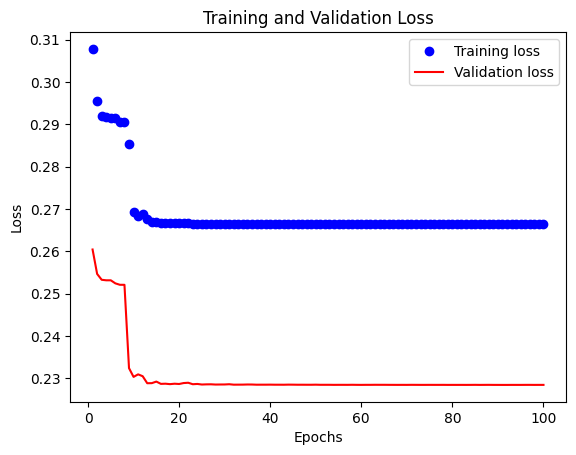

In [76]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot for loss vs. validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [123]:
df_test.columns

Index(['proto', 'service', 'state', 'spkts', 'dpkts', 'dbytes', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_state_ttl',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat'],
      dtype='object')

In [120]:
len(train_data.columns)

36

In [77]:
# Deleting most correlated columns as done in train

df_test.drop(most_correlated,axis=1,inplace=True)

In [78]:
len(df_test.columns)

37

In [79]:
# Deleting spkts columns

df_test.drop("spkts",axis=1,inplace=True)

In [80]:

df_test

proto service state  dpkts  dbytes  sttl  dttl         sload  \
0        tcp       -   FIN      4     172   252   254  1.415894e+04   
1        tcp       -   FIN     38   42014    62   252  8.395112e+03   
2        tcp       -   FIN     16   13186    62   252  1.572272e+03   
3        tcp     ftp   FIN     12     770    62   252  2.740179e+03   
4        tcp       -   FIN      6     268   254   252  8.561499e+03   
...      ...     ...   ...    ...     ...   ...   ...           ...   
175336   udp     dns   INT      0       0   254     0  5.066666e+07   
175337   tcp       -   FIN      8     354   254   252  8.826286e+03   
175338   udp     dns   INT      0       0   254     0  5.066666e+07   
175339   udp     dns   INT      0       0   254     0  5.066666e+07   
175340   udp     dns   INT      0       0   254     0  5.066666e+07   

                dload  sloss  ...  ct_state_ttl  ct_dst_sport_ltm  \
0         8495.365234      0  ...             0                 1   
1       503571.312500      2  ...             1                 1   
2        60929.230470      1  ...             1                 1   
3         3358.622070      1  ...             1                 1   
4         3987.059814      2  ...             1                 1   
...               ...    ...  ...           ...               ...   
175336       0.000000      0  ...             2                13   
175337    4903.492188      2  ...             1                 1   
175338       0.000000      0  ...             2                 3   
175339       0.000000      0  ...             2                14   
175340       0.000000      0  ...             2                16   

        ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0                    1             0           0                 0   
1                    2             0           0                 0   
2                    3             0           0                 0   
3                    3             1           1                 0   
4                   40             0           0                 0   
...                ...           ...         ...               ...   
175336              24             0           0                 0   
175337               2             0           0                 0   
175338              13             0           0                 0   
175339              30             0           0                 0   
175340              30             0           0                 0   

        ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  
0                1           1                0      Normal  
1                1           6                0      Normal  
2                2           6                0      Normal  
3                2           1                0      Normal  
4                2          39                0      Normal  
...            ...         ...              ...         ...  
175336          24          24                0     Generic  
175337           1           1                0   Shellcode  
175338           3          12                0     Generic  
175339          30          30                0     Generic  
175340          30          30                0     Generic  

[175341 rows x 36 columns]

In [81]:
categorical_cols_test=list(df_test.select_dtypes(exclude= np.number).columns)

In [82]:
def encoding_categorical_cols(df:pd.DataFrame,categorical_columns:list,strategy:str):
    df_categorical=pd.DataFrame(df.loc[:,categorical_columns])
    if strategy=="labelencoder":
        for col in list(df_categorical.columns):
            cat=[]
            d={}

            cat.append([df_categorical[col].value_counts().index,len(df_categorical[col].value_counts().index)])

            for j in range(int(cat[0][1])):
                d[str(cat[0][0][j])]=j
            df_categorical[col]=df_categorical[col].map(d)
        df.drop(categorical_columns,axis=1,inplace=True)
        
        df=pd.concat([df,df_categorical],axis=1)
        
    
    return df

In [83]:
df_test=encoding_categorical_cols(df=df_test,categorical_columns=categorical_cols_test,strategy="labelencoder")

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dpkts              175341 non-null  int64  
 1   dbytes             175341 non-null  int64  
 2   sttl               175341 non-null  int64  
 3   dttl               175341 non-null  int64  
 4   sload              175341 non-null  float64
 5   dload              175341 non-null  float64
 6   sloss              175341 non-null  int64  
 7   dloss              175341 non-null  int64  
 8   sinpkt             175341 non-null  float64
 9   dinpkt             175341 non-null  float64
 10  sjit               175341 non-null  float64
 11  djit               175341 non-null  float64
 12  swin               175341 non-null  int64  
 13  stcpb              175341 non-null  int64  
 14  dtcpb              175341 non-null  int64  
 15  dwin               175341 non-null  int64  
 16  tc

In [85]:
scaler = StandardScaler()
# train_data_scaled = scaler.fit_transform(df_test)
test_data_scaled = scaler.fit_transform(df_test)

In [86]:
threshold=95

# You can also apply the same process to the validation set for evaluation
reconstructed_test_data = autoencoder.predict(test_data_scaled)
reconstruction_errors_test = np.mean(np.square(test_data_scaled - reconstructed_test_data), axis=1)
anomalies_test = df_test[reconstruction_errors_test > threshold]

print(len(anomalies_test),"anomalies_test")

175341 anomalies_test
